# SEA Building Energy Benchmarking

****
* Problématique de la ville de Seattle
    Des relevés minutieux ont été effectués par vos agents en 2015 et en 2016. Cependant, ces relevés sont coûteux à obtenir, et à partir de ceux déjà réalisés, vous voulez tenter de prédire les émissions de CO2 et la consommation totale d’énergie de bâtiments pour lesquels elles n’ont pas encore été mesurées.
    
***

In [1]:
# Impotation librairies
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval 
import re

In [2]:
#visualiser l'ensemble du dataframe, toutes les lignes et colonnes.Faire apparaitre l'ensemble des informations.
pd.set_option("display.max_rows", 300)
pd.set_option("display.max_column", 200)
pd.set_option("display.max_colwidth", 15)

In [3]:
#********************************** Calcule des valeurs nulles + pourcentage: ******************************
def calc_inf (df,line):
    
    # ****************** Définition des variabes************************************************************
    nb_line_nan = nb_line_mix = nb_line_ssna= nb_col_nan = nb_col_mix = nb_col_ssna = 0   
         
    #***************************************************** Les statistiques NaN par colonne*****************
    
    n_list = df.isnull().sum().tolist()
    for i in range(len(n_list)):
        if n_list[i] == 0:                     # Nombre de colonnes sans NaN
            nb_col_ssna += 1  
        elif n_list[i] == len(df):             # Nombre de colonnes nulles
            nb_col_nan += 1
        elif 0 < n_list[i] < len(df):          # Nombre de colonnes mixtes
            nb_col_mix += 1
    print("* Nombre de colonnes sans NaN -------:",nb_col_ssna)
    print("* Nombre de colonnes NaN ------------:", nb_col_nan)
    print("* Nombre de colonnes mixtes----------:",nb_col_mix)
   # *************************************** Les statistiques NaN par ligne ********************************

    if line == True:
        for j in range(len(df.index)) :
            if df.iloc[j].isnull().sum() == len(df.columns):         # Nombre de lignes nulles
                nb_line_nan += 1
            elif 0 < df.iloc[j].isnull().sum() < len(df.columns):    # Nombre de lignes mixtes
                nb_line_mix += 1
            elif df.iloc[j].isnull().sum() == 0:                     # Nombre de lignes sans NaN
                nb_line_ssna += 1
        print("* Nombre de ligne entièrement nulles :",nb_line_nan)  
        print("* Nombre de ligne mixtes ----------- :", nb_line_mix) 
        print("* Nombre de ligne sans NaN ----------:", nb_line_ssna)
    #*******************************************************************************************************
    nb_line = df.index.size
    nb_colonne = df.columns.size
    tot = (nb_colonne*nb_line)
    nan = df.isnull().sum().sum()
    nan_prcnt = (100 * nan) / tot
    not_nan = df.notna().sum().sum()
    not_nan_prcnt = float((100 * not_nan) / tot)
    #*******************************************************************************************************
    
    print("* Nombre de lignes -----------------------: {:.0f}".format(nb_line))
    print("* Nombre de colonnes ---------------------: {:.0f}".format(nb_colonne))
    print("* Nombre de cases ------------------------: {:.0f}".format(tot))
    print("* Nombre de valeurs nulles ---------------: {:.0f}".format(nan))
    print("* Nombre de valeurs non nulles -----------: {:.0f}".format(not_nan))
    print("* le pourcentage des valeurs nulles ------:",str("%.1f" % nan_prcnt) + ' %')
    print("* le pourcentage des valeurs non nulles --:",str("%.1f" % not_nan_prcnt) + ' %')
    #a = pd.concat([not_nan_prcnt,nan_prcnt])
    # *******************************************************************************************************
    
    t= [not_nan_prcnt, nan_prcnt]
    plt.pie(t, labels = ['Valeurs non nulles', 
                         'Valeurs nulles (NaN)'],colors =['c', 'r'],
            startangle = 90, shadow = True, explode =(0,0.1),
            autopct = "%1.1f%%", normalize = True)
    plt.title("Le taux de remplissage en %")
    plt.show()

In [4]:
#************************************ Valeurs manquantes et pourcentage en tableau % **************************************

def mssng_val(df):
    mssng_t = pd.DataFrame(columns=['Variable_name', 'Missing_values', 'Missing_rate'])
    mssng_t['Variable_name'] = df.columns
    
    missing = list()
    percentage_missing = list()
    
    for col in df.columns:
        nb_missing = df[col].isna().sum()                  # le nombre des valeurs NaN par colonne
        pc_missing = df[col].isna().sum()/df[col].size     # le pourcentage des valeurs NaN par colonne
        
        missing.append(nb_missing)
        percentage_missing.append(pc_missing)
        
    mssng_t['Missing_values'] = list(missing)
    mssng_t['Missing_rate'] = list(percentage_missing)
    mssng_t = mssng_t.sort_values(by= ['Missing_values'], ascending = False)
    return mssng_t

In [5]:
def comp_val(df):
    comp_t = pd.DataFrame(columns=['Variable_name', 'completation_values', 'completation_rate'])
    comp_t['Variable_name'] = df.columns
    
    completation = list()
    percentage_completation = list()
    
    for col in df.columns:
        nb_completation = df[col].notna().sum()                 # le nombre des valeurs non NaN par colonne
        pc_completation = (df[col].notna().sum()/df[col].size)*100     # le pourcentage des valeurs non NaN par colonne
        
        completation.append(nb_completation)
        percentage_completation.append(pc_completation)
        
    comp_t['completation_values'] = list(completation)
    comp_t['completation_rate'] = list(percentage_completation)
    comp_t = comp_t.sort_values(by= ['completation_values'], ascending = False)
    return comp_t

In [6]:
#*********************************** Choix interquartile ****************************************
def flt_nan(df, seuil):
    df_flt = df.copy()
    for col in df.columns:
        x = (df[col].isna().sum()/df.shape[0])*100 # df.shape[0] ==> index, df.shape[1] ==> columns
        if x >= seuil:
            df_flt = df_flt.drop(columns= col)
  
    #data_set["not_na"].plot(kind ='bar',color = "red", figsize = (15, 5))
    #plt.title('Présentation des colonnes en-dessus de 20% de Nan', size=20)
    
    #data_set["not_na"].plot(kind ='bar', figsize = (15, 5))
    #plt.title('Présentation des valeurs non_na et Nan par variable', size=15)
    return df_flt

In [7]:

def pie_pc(df):
    nb_line = df.index.size
    nb_colonne = df.columns.size
    tot = (nb_colonne*nb_line)
    nan_prcnt = float((100 * df.isnull().sum().sum()) / tot)
    not_nan_prcnt = float((100 * df.notna().sum().sum()) / tot)
    t= [not_nan_prcnt,nan_prcnt]
    plt.pie(t, labels = ['Valeurs non nulles', 'Valeurs nulles (NaN)'],colors =['c', 'r'],
    startangle = 90, shadow = True, explode =(0,0.1), autopct = "%1.1f%%", normalize = True)
    plt.title("Le taux de remplissage en %")
    plt.show()

# 1.Chargement de Data-Set

In [8]:
data_2015 =pd.read_csv("D:\\Projet Classrooms\\Projet_4\\2015_building_energy_benchmarking.csv")
data_2016 = pd.read_csv('D:\\Projet Classrooms\\Projet_4\\2016-building-energy-benchmarking.csv')

****
#  2.Description et nettoyage de données
**** 

In [9]:
display(data_2015, data_2016)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER P...,659000030,{'latitude'...,7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT H...,659000220,{'latitude'...,7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Park...",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,{'latitude'...,7,DOWNTOWN,1969,1,41.0,961990,0,961990,"Hotel, Park...",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,{'latitude'...,7,DOWNTOWN,1926,1,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081
4,8,2015,NonResidential,Hotel,WARWICK SEA...,659000970,{'latitude'...,7,DOWNTOWN,1980,1,18.0,119890,12460,107430,"Hotel, Park...",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,50049,2015,Multifamily...,Low-Rise Mu...,PACIFIC CEN...,6599950000,{'latitude'...,2,DOWNTOWN,2000,1,4.0,44650,0,44650,Multifamily...,Multifamily...,44650.0,NaN,NaN,NaN,NaN,NaN,71.0,25.6,27.8,80.4,87.2,1142949.0,1240429.0,0.0,334979.0,1142996.0,0.0,0.0,0.0,7.97,0.07,No,NaN,Compliant,NaN,NaN,26.0,NaN,16.0,18379
3336,50055,2015,Multifamily...,Mid-Rise Mu...,IDENTITY AP...,1142001670,{'latitude'...,4,NORTHEAST,2014,1,7.0,42393,0,42393,Multifamily...,Multifamily...,31748.0,NaN,NaN,NaN,NaN,NaN,98.0,48.6,55.1,124.2,144.7,1543282.0,1750143.0,0.0,325705.0,1111352.0,4320.0,431976.0,0.0,30.69,0.61,No,NaN,Compliant,NaN,NaN,60.0,NaN,38.0,18383
3337,50057,2015,Multifamily...,High-Rise M...,CIRRUS,660000575,{'latitude'...,7,DOWNTOWN,2015,1,40.0,319481,41915,277566,Multifamily...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.0,52.7,61.4,93.1,102.2,16834414.0,19623362.0,0.0,1690364.0,5767761.0,110669.0,11066893.0,0.0,627.97,1.89,No,NaN,Compliant,NaN,NaN,56.0,NaN,7.0,19576
3338,50058,2015,Multifamily...,Low-Rise Mu...,WEDGEWOOD E...,6392001040,{'latitude'...,4,NORTHEAST,1981,1,3.0,48230,0,48230,Multifamily...,Multifamily...,22310.0,NaN,NaN,NaN,NaN,NaN,44.0,34.8,38.1,109.4,119.5,777064.0,849250.0,0.0,227744.0,777096.0,0.0,0.0,0.0,5.42,0.04,No,NaN,Compliant,N

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower p...,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount H...,724 Pine st...,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Park...",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The We...,1900 5th Av...,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,7.258702e+07,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6.794584e+06,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEA...,401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Park...",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,1.417261e+07,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,NaN,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresident...,Office,Horticultur...,1600 S Dako...,Seattle,WA,NaN,1624049080,2,GREATER DUW...,47.56722,-122.31154,1990,1.0,1,12294,0,12294,Office,Office,12294.0,NaN,NaN,NaN,NaN,NaN,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,NaN,Error - Cor...,NaN,20.94,1.70
3372,50223,2016,Nonresident...,Other,Internation...,719 8th Ave S,Seattle,WA,NaN,3558300000,2,DOWNTOWN,47.59625,-122.32283,2004,1.0,1,16000,0,16000,Other - Rec...,Other - Rec...,16000.0,NaN,NaN,NaN,NaN,NaN,NaN,59.400002,65.900002,114.199997,118.900002,9.502762e+05,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01
3373,50224,2016,Nonresident...,Other,Queen Anne ...,1920 1st Ave W,Seattle,WA,NaN,1794501150,7,MAGNOLIA / ...,47.63644,-122.35784,1974,1.0,1,13157,0,13157,Fitness Cen...,Other - Rec...,7583.0,Fitness Cen...,5574.0,Swimming Pool,0.0,NaN,NaN,438.200012,460.100006,744.799988,767.799988,5.765898e+06,6.053764e+06,0.00,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,False,NaN,Compliant,NaN,223.54,16.99
3374,5

In [10]:
data_2015.shape, data_2016.shape

((3340, 47), (3376, 46))

* Nombre de colonnes sans NaN -------: 15
* Nombre de colonnes NaN ------------: 0
* Nombre de colonnes mixtes----------: 32
* Nombre de ligne entièrement nulles : 0
* Nombre de ligne mixtes ----------- : 3340
* Nombre de ligne sans NaN ----------: 0
* Nombre de lignes -----------------------: 3340
* Nombre de colonnes ---------------------: 47
* Nombre de cases ------------------------: 156980
* Nombre de valeurs nulles ---------------: 26512
* Nombre de valeurs non nulles -----------: 130468
* le pourcentage des valeurs nulles ------: 16.9 %
* le pourcentage des valeurs non nulles --: 83.1 %


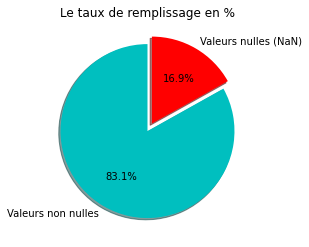

In [11]:
calc_inf(data_2015,True)

* Nombre de colonnes sans NaN -------: 20
* Nombre de colonnes NaN ------------: 1
* Nombre de colonnes mixtes----------: 25
* Nombre de ligne entièrement nulles : 0
* Nombre de ligne mixtes ----------- : 3376
* Nombre de ligne sans NaN ----------: 0
* Nombre de lignes -----------------------: 3376
* Nombre de colonnes ---------------------: 46
* Nombre de cases ------------------------: 155296
* Nombre de valeurs nulles ---------------: 19952
* Nombre de valeurs non nulles -----------: 135344
* le pourcentage des valeurs nulles ------: 12.8 %
* le pourcentage des valeurs non nulles --: 87.2 %


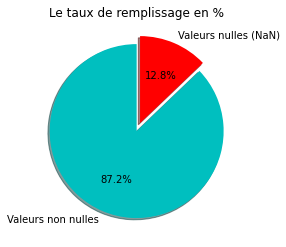

In [12]:
calc_inf(data_2016,True)

****
##  Comparaison de data_2015 et data_2016
**** 

In [13]:
def comp_data(data_1,data_2):
    list_1 = [col for col in data_1 if col not in data_2]
    print('* Le nombre de colonnes absentes sur data_2016 : ',len(list_1),' \n\n',list_1)
    print('')
    print('-'*120)

    list_2 = [col for col in data_2 if col not in data_1]
    print('* Le nombre de colonnes absentes sur data_2015 :',len(list_2),' \n\n',list_2)
    print('-'*120)

    list_3 = [col for col in data_2 if col in data_1]
    print('* Le nombre des colonnes communes :',len(list_3),' \n\n',list_3)
    

In [14]:
comp_data(data_2015,data_2016)

* Le nombre de colonnes absentes sur data_2016 :  10  

 ['Location', 'OtherFuelUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)', 'Comment', '2010 Census Tracts', 'Seattle Police Department Micro Community Policing Plan Areas', 'City Council Districts', 'SPD Beats', 'Zip Codes']

------------------------------------------------------------------------------------------------------------------------
* Le nombre de colonnes absentes sur data_2015 : 9  

 ['Address', 'City', 'State', 'ZipCode', 'Latitude', 'Longitude', 'Comments', 'TotalGHGEmissions', 'GHGEmissionsIntensity']
------------------------------------------------------------------------------------------------------------------------
* Le nombre des colonnes communes : 37  

 ['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType', 'PropertyName', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATota

In [15]:
print(data_2015['Location'][2])
# on constate que ces infos sont en colonnes dans data_2016, donc on va les mettre en colonne

{'latitude': '47.61334897', 'longitude': '-122.33769944', 'human_address': '{"address": "1900 5TH AVE", "city": "SEATTLE", "state": "WA", "zip": "98101"}'}


In [16]:
data_2015_new =  data_2015.copy()
print(data_2015_new.shape)
data_2015_new = pd.concat([data_2015_new.drop(['Location'],axis=1),data_2015_new['Location'].map(literal_eval).apply(pd.Series)],axis=1)
data_2015_new = pd.concat([data_2015_new.drop(['human_address'],axis=1), data_2015_new['human_address'].map(literal_eval).apply(pd.Series)], axis=1)
print(data_2015_new.shape)

(3340, 47)
(3340, 52)


***    
    * Après la transformation de cette liste (Latitude, Longitude, Address, City, State, ZipCode) en colonnes, maintenant on va renommer ces variables pour faciliter la fusion des deux data-Set
    * on renomme également les deux variables 'GHGEmissions(MetricTonsCO2e)','GHGEmissionsIntensity(kgCO2e/ft2)' qui sont les même danns data 2016
***

In [17]:
data_2015_new

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes,latitude,longitude,address,city,state,zip
0,1,2015,NonResidential,Hotel,MAYFLOWER P...,659000030,7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081,47.61219025,-122.33799744,405 OLIVE WAY,SEATTLE,WA,98101
1,2,2015,NonResidential,Hotel,PARAMOUNT H...,659000220,7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Park...",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081,47.61310583,-122.33335756,724 PINE ST,SEATTLE,WA,98101
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1,41.0,961990,0,961990,"Hotel, Park...",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081,47.61334897,-122.33769944,1900 5TH AVE,SEATTLE,WA,98101
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,7,DOWNTOWN,1926,1,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081,47.61421585,-122.33660889,620 STEWART ST,SEATTLE,WA,98101
4,8,2015,NonResidential,Hotel,WARWICK SEA...,659000970,7,DOWNTOWN,1980,1,18.0,119890,12460,107430,"Hotel, Park...",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576,47.6137544,-122.3409238,401 LENORA ST,SEATTLE,WA,98121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,50049,2015,Multifamily...,Low-Rise Mu...,PACIFIC CEN...,6599950000,2,DOWNTOWN,2000,1,4.0,44650,0,44650,Multifamily...,Multifamily...,44650.0,NaN,NaN,NaN,NaN,NaN,71.0,25.6,27.8,80.4,87.2,1142949.0,1240429.0,0.0,334979.0,1142996.0,0.0,0.0,0.0,7.97,0.07,No,NaN,Compliant,NaN,NaN,26.0,NaN,16.0,18379,47.59950256,-122.32034302,321 10TH AVE S,SEATTLE,WA,98104
3336,50055,2015,Multifamily...,Mid-Rise Mu...,IDENTITY AP...,1142001670,4,NORTHEAST,2014,1,7.0,42393,0,42393,Multifamily...,Multifamily...,31748.0,NaN,NaN,NaN,NaN,NaN,98.0,48.6,55.1,124.2,144.7,1543282.0,1750143.0,0.0,325705.0,1111352.0,4320.0,431976.0,0.0,30.69,0.61,No,NaN,Compliant,NaN,NaN,60.0,NaN,38.0,18383,47.65752471,-122.3160159,4123 12TH A...,SEATTLE,WA,98105
3337,50057,2015,Multifamily...,High-Rise M...,CIRRUS,660000575,7,DOWNTOWN,2015,1,40.0,319481,41915,277566,Multifamily...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.0,52.7,61.4,93.1,102.2,16834414.0,19623362.0,0.0,1690364.0,5767761.0,110669.0,11066893.0,0.0,627.97,1.89,No,N

In [18]:
# On renomme les colonnes de data_2015 pour avoir les mêmes noms de variables que data_2016 
data_2015_new.rename(columns={'GHGEmissions(MetricTonsCO2e)'     : 'TotalGHGEmissions',
                          'GHGEmissionsIntensity(kgCO2e/ft2)': 'GHGEmissionsIntensity',
                          'Comment'                          : 'Comments',
                          'zip'                              : 'ZipCode',
                          'latitude'                         :'Latitude',
                          'longitude'                        : 'Longitude',
                          'state'                            : 'State',
                          'city'                             : 'City',
                          'address'                          : 'Address'
                                                                 }, inplace=True)

In [19]:
diff_2015 =  ['OtherFuelUse(kBtu)', '2010 Census Tracts', 
             'Seattle Police Department Micro Community Policing Plan Areas', 
             'City Council Districts', 'SPD Beats', 'Zip Codes']
data_2015_new[diff_2015]

,OtherFuelUse(kBtu),2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,0.0,NaN,14.0,NaN,31.0,18081
1,0.0,NaN,14.0,NaN,31.0,18081
2,0.0,NaN,56.0,NaN,31.0,18081
3,0.0,NaN,56.0,NaN,31.0,18081
4,0.0,NaN,56.0,NaN,31.0,19576
...,...,...,...,...,...,...
3335,0.0,NaN,26.0,NaN,16.0,18379
3336,0.0,NaN,60.0,NaN,38.0,18383
3337,0.0,NaN,56.0,NaN,7.0,19576
3338,0.0,NaN,55.0,NaN,48.0,18792


    * Concernant la liste diff_2015 on va la supprimer du data_2015_new car pas trop intéressante
 ***

In [20]:
data_2015_new = data_2015_new.drop(diff_2015, axis=1)

In [21]:
data_2015_new.shape, data_2016.shape

((3340, 46), (3376, 46))

In [22]:
comp_data(data_2015_new, data_2016)

* Le nombre de colonnes absentes sur data_2016 :  0  

 []

------------------------------------------------------------------------------------------------------------------------
* Le nombre de colonnes absentes sur data_2015 : 0  

 []
------------------------------------------------------------------------------------------------------------------------
* Le nombre des colonnes communes : 46  

 ['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType', 'PropertyName', 'Address', 'City', 'State', 'ZipCode', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood', 'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes', 'LargestPropertyUseType', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified', 'ENERGYSTARS

 ### Le merge de data_2015_new et data_2016
 
    * Maintenant on va entamer la concaténation des deux data-Set 2015 et 2016
 ***

In [23]:
data_uni = pd.concat([data_2015_new,data_2016])
data_uni.to_csv('D:/Projet Classrooms/Projet_4/data_uni.csv', index = False)
data_uni.shape

(6716, 46)

In [24]:
# On regorupe les données de bâtiments communs, en moyennant les valeurs
data_uni = data_uni.groupby(["OSEBuildingID"]).agg("mean")

In [25]:
data_uni

,DataYear,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,,,,,
1,2015.5,7.0,1927.0,1.0,12.0,88434.0,0.0,88434.0,88434.0,NaN,NaN,62.5,80.299998,82.300002,178.000000,182.050000,7.103895e+06,7.277224e+06,2.013457e+06,1.118411e+06,3.816094e+06,12744.264650,1.274420e+06,249.705,2.735
2,2015.5,7.0,1996.0,1.0,11.0,103566.0,15064.0,88502.0,83880.0,15064.0,4622.0,56.0,94.600002,98.450001,183.700003,187.299997,8.371084e+06,8.715134e+06,0.000000e+00,1.047494e+06,3.574131e+06,47970.408205,4.797034e+06,279.685,2.620
3,2015.5,7.0,1969.0,1.0,41.0,959050.0,98359.0,860691.0,756868.0,100000.0,0.0,30.5,96.300000,98.699998,242.299997,245.300003,7.285884e+07,7.472169e+07,2.061348e+07,1.454968e+07,4.964455e+07,26018.500000,2.601850e+06,2075.380,2.055
5,2015.5,7.0,1926.0,1.0,10.0,61320.0,0.0,61320.0,61320.0,NaN,NaN,28.5,285.600002,287.900002,426.249998,433.600000,1.751195e+07,1.765512e+07,1.283648e+07,8.115232e+05,2.768974e+06,19065.565430,1.906554e+06,1111.385,18.025
8,2015.5,7.0,1980.0,1.0,18.0,147735.0,37230.0,110505.0,123445.0,68009.0,0.0,71.0,117.450002,120.399998,220.099997,221.350003,1.450085e+07,1.486737e+07,0.000000e+00,1.675645e+06,5.717426e+06,87835.492190,8.783552e+06,506.355,3.450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50222,2016.0,2.0,1990.0,1.0,1.0,12294.0,0.0,12294.0,12294.0,NaN,NaN,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.000000e+00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,20.940,1.700
50223,2016.0,2.0,2004.0,1.0,1.0,16000.0,0.0,16000.0,16000.0,NaN,NaN,NaN,59.400002,65.900002,114.199997,118.900002,9.502762e+05,1.053706e+06,0.000000e+00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,32.170,2.010
50224,2016.0,7.0,1974.0,1.0,1.0,13157.0,0.0,13157.0,7583.0,5574.0,0.0,NaN,438.200012,460.100006,744.799988,767.799988,5.765898e+06,6.053764e+06,0.000000e+00,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,223.540,16.990


In [26]:
# Liste des variables catégorielles
cat_features = list(data_2015_new.drop(columns=list(data_uni.columns) + ["OSEBuildingID"]).columns)
cat_features

['BuildingType',
 'PrimaryPropertyType',
 'PropertyName',
 'TaxParcelIdentificationNumber',
 'Neighborhood',
 'ListOfAllPropertyUseTypes',
 'LargestPropertyUseType',
 'SecondLargestPropertyUseType',
 'ThirdLargestPropertyUseType',
 'YearsENERGYSTARCertified',
 'DefaultData',
 'Comments',
 'ComplianceStatus',
 'Outlier',
 'Latitude',
 'Longitude',
 'Address',
 'City',
 'State',
 'ZipCode']

In [27]:
# On ajoute les valeurs des variables catégorielles pour les bâtiments de 2016
data_uni[cat_features] = data_2016.set_index("OSEBuildingID")[cat_features]
data_uni[cat_features]


,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Neighborhood,ListOfAllPropertyUseTypes,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,YearsENERGYSTARCertified,DefaultData,Comments,ComplianceStatus,Outlier,Latitude,Longitude,Address,City,State,ZipCode
OSEBuildingID,,,,,,,,,,,,,,,,,,,,
1,NonResidential,Hotel,Mayflower p...,0659000030,DOWNTOWN,Hotel,Hotel,NaN,NaN,NaN,False,NaN,Compliant,NaN,47.61220,-122.33799,405 Olive way,Seattle,WA,98101.0
2,NonResidential,Hotel,Paramount H...,0659000220,DOWNTOWN,"Hotel, Park...",Hotel,Parking,Restaurant,NaN,False,NaN,Compliant,NaN,47.61317,-122.33393,724 Pine st...,Seattle,WA,98101.0
3,NonResidential,Hotel,5673-The We...,0659000475,DOWNTOWN,Hotel,Hotel,NaN,NaN,NaN,False,NaN,Compliant,NaN,47.61393,-122.33810,1900 5th Av...,Seattle,WA,98101.0
5,NonResidential,Hotel,HOTEL MAX,0659000640,DOWNTOWN,Hotel,Hotel,NaN,NaN,NaN,False,NaN,Compliant,NaN,47.61412,-122.33664,620 STEWART ST,Seattle,WA,98101.0
8,NonResidential,Hotel,WARWICK SEA...,0659000970,DOWNTOWN,"Hotel, Park...",Hotel,Parking,Swimming Pool,NaN,False,NaN,Compliant,NaN,47.61375,-122.34047,401 LENORA ST,Seattle,WA,98121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50222,Nonresident...,Office,Horticultur...,1624049080,GREATER DUW...,Office,Office,NaN,NaN,NaN,True,NaN,Error - Cor...,NaN,47.56722,-122.31154,1600 S Dako...,Seattle,WA,NaN
50223,Nonresident...,Other,Internation...,3558300000,DOWNTOWN,Other - Rec...,Other - Rec...,NaN,NaN,NaN,False,NaN,Compliant,NaN,47.59625,-122.32283,719 8th Ave S,Seattle,WA,NaN
50224,Nonresident...,Other,Queen Anne ...,1794501150,MAGNOLIA / ...,Fitness Cen...,Other - Rec...,Fitness Cen...,Swimming Pool,NaN,False,NaN,Compliant,NaN,47.63644,-122.35784,1920 1st Ave W,Seattle,WA,NaN


In [28]:
# On ajoute les valeurs des variables catégorielles pour les bâtiments uniques de 2015

OSEBuildingID_2015 = [ID for ID in data_2015_new["OSEBuildingID"] if ID not in data_2016["OSEBuildingID"].values]


In [29]:
#data_uni[cat_features] = data_2016.set_index("OSEBuildingID")[cat_features]

data_uni.loc[OSEBuildingID_2015, cat_features] = data_2015_new.set_index("OSEBuildingID")\
                                                .loc[OSEBuildingID_2015, cat_features]

In [30]:
lst = ["DataYear","NumberofBuildings", "CouncilDistrictCode", "YearBuilt", "NumberofFloors",
       ]
lst_ = ['ZipCode', 'Latitude','Longitude']

for col in lst:
    data_uni[col] = data_uni[col].apply('int64')
    
for col in lst_:
    data_uni[col] = data_uni[col].apply('float64')


In [31]:
data_uni

,DataYear,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Neighborhood,ListOfAllPropertyUseTypes,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,YearsENERGYSTARCertified,DefaultData,Comments,ComplianceStatus,Outlier,Latitude,Longitude,Address,City,State,ZipCode
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2015,7,1927,1,12,88434.0,0.0,88434.0,88434.0,NaN,NaN,62.5,80.299998,82.300002,178.000000,182.050000,7.103895e+06,7.277224e+06,2.013457e+06,1.118411e+06,3.816094e+06,12744.264650,1.274420e+06,249.705,2.735,NonResidential,Hotel,Mayflower p...,0659000030,DOWNTOWN,Hotel,Hotel,NaN,NaN,NaN,False,NaN,Compliant,NaN,47.61220,-122.33799,405 Olive way,Seattle,WA,98101.0
2,2015,7,1996,1,11,103566.0,15064.0,88502.0,83880.0,15064.0,4622.0,56.0,94.600002,98.450001,183.700003,187.299997,8.371084e+06,8.715134e+06,0.000000e+00,1.047494e+06,3.574131e+06,47970.408205,4.797034e+06,279.685,2.620,NonResidential,Hotel,Paramount H...,0659000220,DOWNTOWN,"Hotel, Park...",Hotel,Parking,Restaurant,NaN,False,NaN,Compliant,NaN,47.61317,-122.33393,724 Pine st...,Seattle,WA,98101.0
3,2015,7,1969,1,41,959050.0,98359.0,860691.0,756868.0,100000.0,0.0,30.5,96.300000,98.699998,242.299997,245.300003,7.285884e+07,7.472169e+07,2.061348e+07,1.454968e+07,4.964455e+07,26018.500000,2.601850e+06,2075.380,2.055,NonResidential,Hotel,5673-The We...,0659000475,DOWNTOWN,Hotel,Hotel,NaN,NaN,NaN,False,NaN,Compliant,NaN,47.61393,-122.33810,1900 5th Av...,Seattle,WA,98101.0
5,2015,7,1926,1,10,61320.0,0.0,61320.0,61320.0,NaN,NaN,28.5,285.600002,287.900002,426.249998,433.600000,1.751195e+07,1.765512e+07,1.283648e+07,8.115232e+05,2.768974e+06,19065.565430,1.906554e+06,1111.385,18.025,NonResidential,Hotel,HOTEL MAX,0659000640,DOWNTOWN,Hotel,Hotel,NaN,NaN,NaN,False,NaN,Compliant,NaN,47.61412,-122.33664,620 STEWART ST,Seattle,WA,98101.0
8,2015,7,1980,1,18,147735.0,37230.0,110505.0,123445.0,68009.0,0.0,71.0,117.450002,120.399998,220.099997,221.350003,1.450085e+07,1.486737e+07,0.000000e+00,1.675645e+06,5.717426e+06,87835.492190,8.783552e+06,506.355,3.450,NonResidential,Hotel,WARWICK SEA...,0659000970,DOWNTOWN,"Hotel, Park...",Hotel,Parking,Swimming Pool,NaN,False,NaN,Compliant,NaN,47.61375,-122.34047,401 LENORA ST,Seattle,WA,98121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50222,2016,2,1990,1,1,12294.0,0.0,12294.0,12294.0,NaN,NaN,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.000000e+00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,20.940,1.700,Nonresident...,Office,Horticultur...,1624049080,GREATER DUW...,Office,Office,NaN,NaN,NaN,True,NaN,Error - Cor...,NaN,47.56722,-122.31154,1600 S Dako...,Seattle,WA,NaN
50223,2016,2,2004,1,1,16000.0,0.0,16000.0,16000.0,NaN,NaN,NaN,59.400002,65.900002,114.199997,118.900002,9.502762e+05,1.053706e+06,0.000000e+00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,32.170,2.010,Nonresident...,Other,Internation...,3558300000,DOWNTOWN,Other - Rec...,Other - Rec...,NaN,NaN,NaN,False,NaN,Compliant,NaN,47.59625,-122.32283,719 8th Ave S,Seattle,WA,NaN
50224,2016,7,1974,1,1,13157.0,0.0,13157.0,7583.0,5574.0,0.0,NaN,438.200012,460.100006,744.799988,767.799988,5.765898e+06,6.053764e+06,0.000000e+00,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,223.540,16.990,Nonresident...,Other,Queen Anne ...,1794501150,MAGNOLIA / ...,Fitness Cen...,Other - Rec..

In [32]:
data_uni.shape

(3432, 45)

## Description des variables:
  ******
        *   Numériques
        *   Catégorielles

  *****

In [33]:
data_uni.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3432 entries, 1 to 50226
Data columns (total 45 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   DataYear                         3432 non-null   int64  
 1   CouncilDistrictCode              3432 non-null   int64  
 2   YearBuilt                        3432 non-null   int64  
 3   NumberofBuildings                3432 non-null   int64  
 4   NumberofFloors                   3432 non-null   int64  
 5   PropertyGFATotal                 3432 non-null   float64
 6   PropertyGFAParking               3432 non-null   float64
 7   PropertyGFABuilding(s)           3432 non-null   float64
 8   LargestPropertyUseTypeGFA        3402 non-null   float64
 9   SecondLargestPropertyUseTypeGFA  1704 non-null   float64
 10  ThirdLargestPropertyUseTypeGFA   607 non-null    float64
 11  ENERGYSTARScore                  2656 non-null   float64
 12  SiteEUI(kBtu/sf)   

### Variables catégorielles
****


In [34]:
data_uni.describe(include = 'object')

,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Neighborhood,ListOfAllPropertyUseTypes,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,YearsENERGYSTARCertified,DefaultData,Comments,ComplianceStatus,Outlier,Address,City,State
count,3432,3432,3432,3431,3432,3407,3396,1698,602,120,3432,1,3432,35,3432,3432,3432
unique,8,26,3418,3321,19,472,57,50,44,65,4,1,4,3,3410,2,1
top,NonResidential,Low-Rise Mu...,Northgate P...,1625049001,DOWNTOWN,Multifamily...,Multifamily...,Parking,Retail Store,2016,False,Under const...,Compliant,Low outlier,2600 SW Bar...,Seattle,WA
freq,1488,1009,3,8,586,874,1683,988,112,14,3263,1,3267,23,4,3376,3432


### Variables numériques
****


In [35]:
data_uni.describe(include = 'int64')

,DataYear,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors
count,3432.000000,3432.000000,3432.000000,3.432000e+03,3432.000000
mean,2015.026807,4.446970,1968.360140,-2.687463e+15,4.688228
std,0.161541,2.120142,33.182901,1.574404e+17,5.458473
min,2015.000000,1.000000,1900.000000,-9.223372e+18,0.000000
25%,2015.000000,3.000000,1948.000000,1.000000e+00,2.000000
50%,2015.000000,4.000000,1974.000000,1.000000e+00,4.000000
75%,2015.000000,7.000000,1997.000000,1.000000e+00,5.000000
max,2016.000000,7.000000,2015.000000,1.110000e+02,99.000000


In [36]:
data_uni.describe(include = 'float')

,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Latitude,Longitude,ZipCode
count,3.432000e+03,3432.000000,3.432000e+03,3.402000e+03,1704.000000,607.000000,2656.000000,3429.000000,3429.000000,3428.000000,3428.000000,3.429000e+03,3.429000e+03,3.428000e+03,3.428000e+03,3.428000e+03,3.428000e+03,3.428000e+03,3428.000000,3428.000000,3432.000000,3432.000000,3416.000000
mean,9.447183e+04,9651.224068,8.482061e+04,7.921153e+04,28497.813467,11660.911531,68.116717,54.445859,57.489341,133.943174,138.589950,5.398222e+06,5.311222e+06,2.737963e+05,1.087418e+06,3.710342e+06,1.361560e+04,1.361560e+06,119.311982,1.092922,47.624211,-122.334819,98116.965457
std,2.172062e+05,32953.838541,2.048840e+05,2.011318e+05,54202.216986,29021.209831,26.377049,55.895447,57.157732,137.744473,137.275549,2.152855e+07,1.595773e+07,3.795683e+06,4.332754e+06,1.478348e+07,6.729292e+04,6.729292e+06,534.287074,1.769338,0.047818,0.027163,18.610817
min,1.128500e+04,-1.500000,-8.451000e+03,6.455000e+03,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-2.050000,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,7.000000e+00,0.000000e+00,0.000000e+00,0.090000,0.000000,47.499170,-122.414250,98006.000000
25%,2.846350e+04,0.000000,2.726825e+04,2.505300e+04,5000.000000,2275.500000,52.500000,27.850000,29.600000,74.287500,79.500000,9.293272e+05,9.898913e+05,0.000000e+00,1.859820e+05,6.345736e+05,0.000000e+00,0.000000e+00,9.568750,0.150000,47.600077,-122.350662,98105.000000
50%,4.419500e+04,0.000000,4.213725e+04,3.986750e+04,10725.500000,5000.000000,75.500000,38.100001,40.650001,95.900000,101.599999,1.792235e+06,1.940694e+06,0.000000e+00,3.440100e+05,1.173787e+06,3.211758e+03,3.211605e+05,33.842500,0.545000,47.618735,-122.332630,98115.000000
75%,9.044875e+04,2890.250000,8.192375e+04,7.557300e+04,26797.250000,10182.500000,89.625000,60.050000,64.750001,144.150000,149.900002,4.195498e+06,4.402542e+06,0.000000e+00,8.214296e+05,2.802775e+06,1.152796e+04,1.152789e+06,91.890000,1.290000,47.657157,-122.319407,98122.000000
max,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,686750.000000,459748.000000,100.000000,834.400024,834.400024,2620.000000,2620.000000,8.739237e+08,4.716139e+08,1.314066e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,16870.980000,34.090000,47.733870,-122.220966,98272.000000


 ***
 ## Nettoyage des données
 
***

* Nombre de colonnes sans NaN -------: 19
* Nombre de colonnes NaN ------------: 0
* Nombre de colonnes mixtes----------: 26
* Nombre de ligne entièrement nulles : 0
* Nombre de ligne mixtes ----------- : 3432
* Nombre de ligne sans NaN ----------: 0
* Nombre de lignes -----------------------: 3432
* Nombre de colonnes ---------------------: 45
* Nombre de cases ------------------------: 154440
* Nombre de valeurs nulles ---------------: 20189
* Nombre de valeurs non nulles -----------: 134251
* le pourcentage des valeurs nulles ------: 13.1 %
* le pourcentage des valeurs non nulles --: 86.9 %


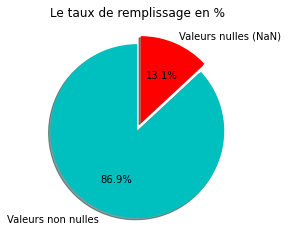

In [37]:
calc_inf(data_uni,True)

In [38]:
nan_data_uni= mssng_val(data_uni)
nan_data_uni

,Variable_name,Missing_values,Missing_rate
36,Comments,3431,0.999709
38,Outlier,3397,0.989802
34,YearsENERGY...,3312,0.965035
33,ThirdLarges...,2830,0.824592
10,ThirdLarges...,2825,0.823135
32,SecondLarge...,1734,0.505245
9,SecondLarge...,1728,0.503497
11,ENERGYSTARS...,776,0.226107
31,LargestProp...,36,0.010490
8,LargestProp...,30,0.008741


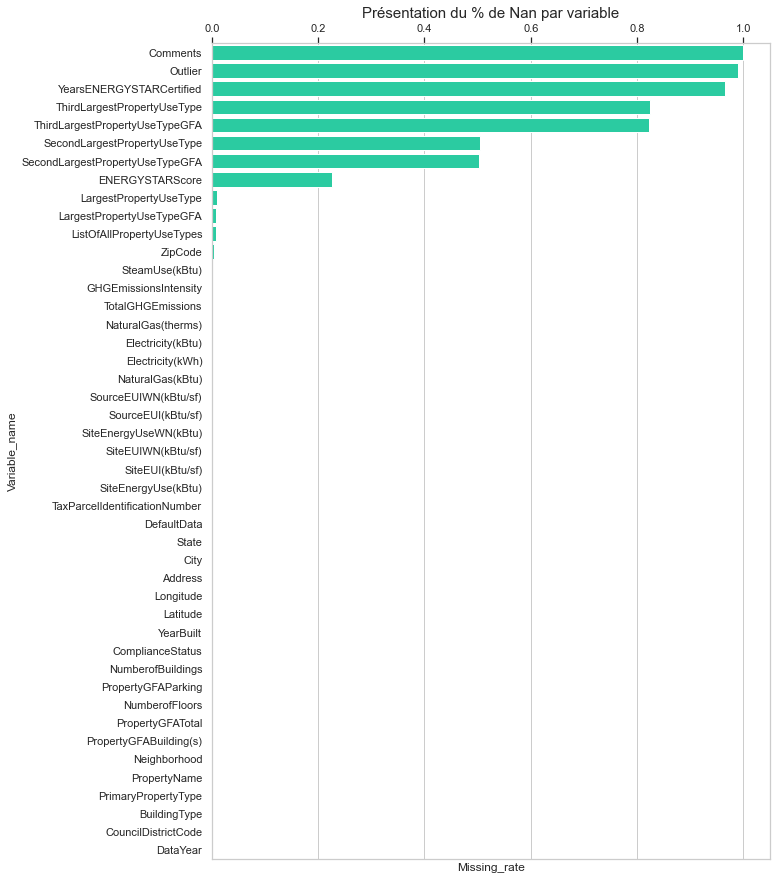

In [39]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 15))
ax = sns.barplot(x = nan_data_uni['Missing_rate'], y = nan_data_uni['Variable_name'], orient = 'h',color = '#11E5AD' )
ax.xaxis.set_ticks_position('top')
plt.title('Présentation du % de Nan par variable', size=15)
plt.show()

C:\Users\Win\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


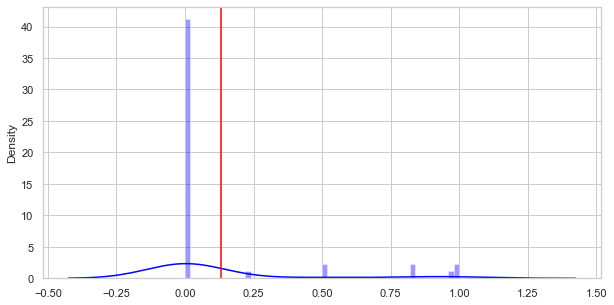

In [40]:
plt.figure(figsize=(10, 5))
dis_nan = nan_data_uni['Missing_rate'].values
sns.distplot(dis_nan, color= 'blue', kde=True)
mean = nan_data_uni['Missing_rate'].mean()
plt.axvline(mean, 0, 1, color='red')
plt.show()

In [41]:
complt = comp_val(data_uni)
complt

,Variable_name,completation_values,completation_rate
0,DataYear,3432,100.000000
41,Address,3432,100.000000
1,CouncilDist...,3432,100.000000
27,PropertyName,3432,100.000000
29,Neighborhood,3432,100.000000
35,DefaultData,3432,100.000000
37,ComplianceS...,3432,100.000000
39,Latitude,3432,100.000000
25,BuildingType,3432,100.000000
40,Longitude,3432,100.000000


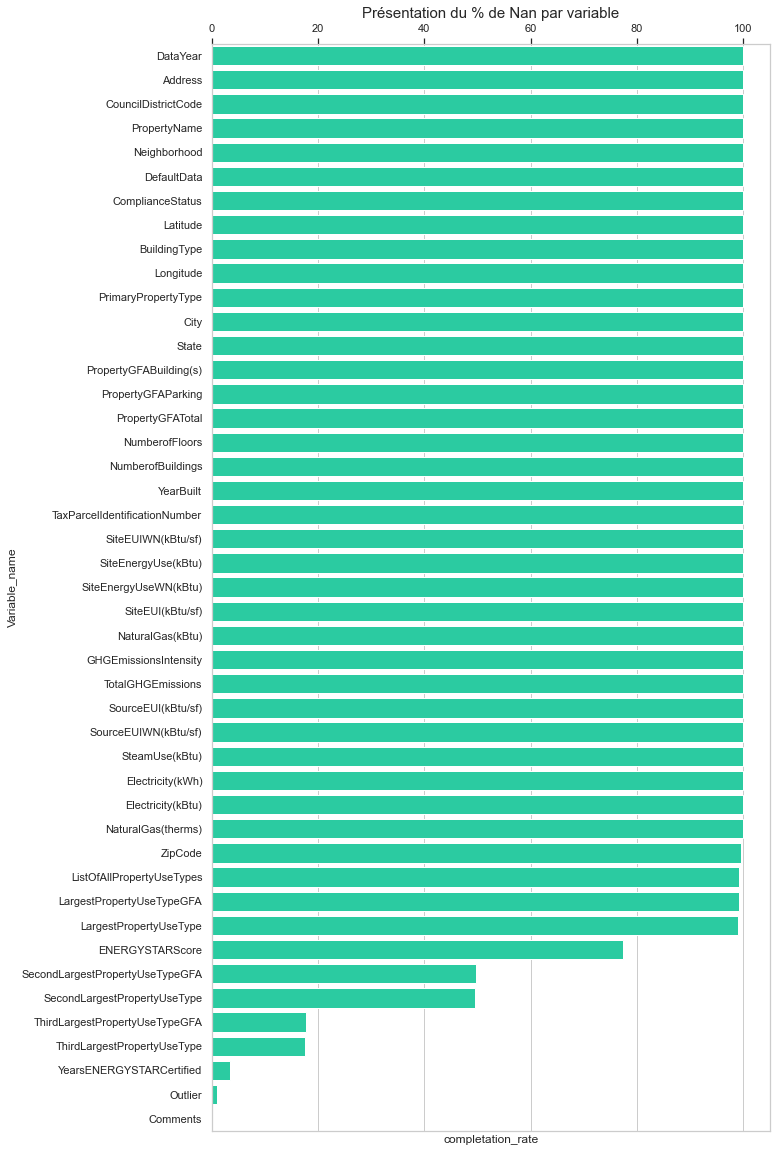

In [42]:

sns.set(style="whitegrid")
plt.figure(figsize=(10, 20))
ax = sns.barplot(x = complt['completation_rate'], y = complt['Variable_name'], orient = 'h',color = '#11E5AD' )
ax.xaxis.set_ticks_position('top')
plt.title('Présentation du % de Nan par variable', size=15)
plt.show()

### Suppréssion des colonnes qui contiennent plus de 80% de NaN

***

In [43]:
data_uni = flt_nan(data_uni, 80) # Suppréssion des colonnes qui contiennent plus de 80% de NaN
data_uni.shape

(3432, 40)

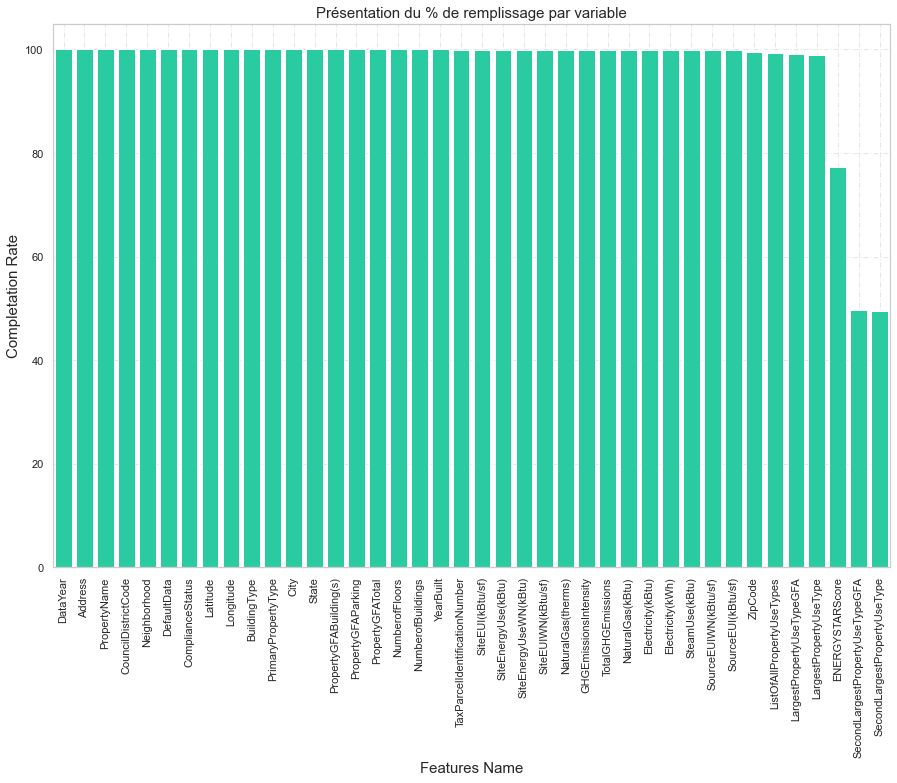

In [44]:
compl = comp_val(data_uni)
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
plt.xticks(rotation=90)
ax = sns.barplot(y = compl['completation_rate'], x = compl['Variable_name'], orient = 'v',color = '#11E5AD' )
plt.title('Présentation du % de remplissage par variable', fontsize=15)
ax.set_xlabel("Features Name",fontsize = 15)
ax.set_ylabel("Completation Rate", fontsize = 15)
plt.grid(True, color='0.9', dashes=(5,2,1,2))
plt.show()

C:\Users\Win\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


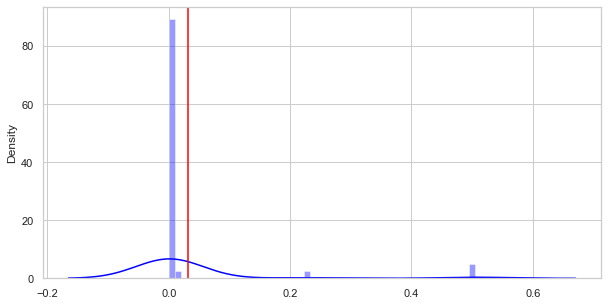

In [45]:
nan_data= mssng_val(data_uni)
nan_data
plt.figure(figsize=(10, 5))
dis_nan = nan_data['Missing_rate'].values
sns.distplot(dis_nan, color= 'blue', kde=True)
mean = nan_data['Missing_rate'].mean()
plt.axvline(mean, 0, 1, color='red')
plt.show()

* Nombre de colonnes sans NaN -------: 19
* Nombre de colonnes NaN ------------: 0
* Nombre de colonnes mixtes----------: 21
* Nombre de ligne entièrement nulles : 0
* Nombre de ligne mixtes ----------- : 2246
* Nombre de ligne sans NaN ----------: 1186
* Nombre de lignes -----------------------: 3432
* Nombre de colonnes ---------------------: 40
* Nombre de cases ------------------------: 137280
* Nombre de valeurs nulles ---------------: 4394
* Nombre de valeurs non nulles -----------: 132886
* le pourcentage des valeurs nulles ------: 3.2 %
* le pourcentage des valeurs non nulles --: 96.8 %


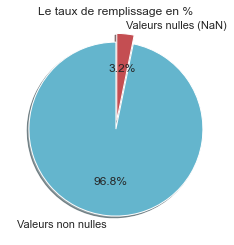

In [46]:
calc_inf(data_uni,True)

****
     * WN : "Weather Normalized"
     * GFA :Ground Floor Area
     
    les variables à prédir:
    
     * la consommation d'énergie ==> SiteEnergyUse(kBtu) 
     * les émissions de CO2      ==> TotalGHGEmissions
     * ENERGYSTARScore
     
    * SiteEUI(kBtu/sf) ==> l'intensité d'utilisation énergétique (IUE) 
    
      *************************************Energy Use Intensity (EUI)***************************************************
    * Il est calculé en divisant l'énergie totale consommée par le bâtiment en un an (mesurée en kBtu ou GJ) par la surface de plancher brute totale du bâtiment (mesurée en pieds carrés ou en mètres carrés).
       
    * 'PropertyGFATotal' = 'LargestPropertyUseTypeGFA'+'SecondLargestPropertyUseTypeGFA'+'ThirdLargestPropertyUseTypeGFA',
****

# Sélection de features :
****


In [47]:
data_uni.nunique().sort_values(ascending = False)

SiteEnergyUse(kBtu)                3429
Electricity(kWh)                   3428
Electricity(kBtu)                  3427
SiteEnergyUseWN(kBtu)              3421
PropertyName                       3418
Address                            3410
TaxParcelIdentificationNumber      3321
PropertyGFABuilding(s)             3246
PropertyGFATotal                   3243
LargestPropertyUseTypeGFA          3166
TotalGHGEmissions                  3156
SourceEUIWN(kBtu/sf)               3135
SourceEUI(kBtu/sf)                 3126
Latitude                           2932
SiteEUIWN(kBtu/sf)                 2805
SiteEUI(kBtu/sf)                   2759
Longitude                          2711
NaturalGas(kBtu)                   2172
NaturalGas(therms)                 2171
SecondLargestPropertyUseTypeGFA    1384
PropertyGFAParking                  956
GHGEmissionsIntensity               916
ListOfAllPropertyUseTypes           472
ENERGYSTARScore                     198
SteamUse(kBtu)                      135


In [48]:
data_uni

,DataYear,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Neighborhood,ListOfAllPropertyUseTypes,LargestPropertyUseType,SecondLargestPropertyUseType,DefaultData,ComplianceStatus,Latitude,Longitude,Address,City,State,ZipCode
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2015,7,1927,1,12,88434.0,0.0,88434.0,88434.0,NaN,62.5,80.299998,82.300002,178.000000,182.050000,7.103895e+06,7.277224e+06,2.013457e+06,1.118411e+06,3.816094e+06,12744.264650,1.274420e+06,249.705,2.735,NonResidential,Hotel,Mayflower p...,0659000030,DOWNTOWN,Hotel,Hotel,NaN,False,Compliant,47.61220,-122.33799,405 Olive way,Seattle,WA,98101.0
2,2015,7,1996,1,11,103566.0,15064.0,88502.0,83880.0,15064.0,56.0,94.600002,98.450001,183.700003,187.299997,8.371084e+06,8.715134e+06,0.000000e+00,1.047494e+06,3.574131e+06,47970.408205,4.797034e+06,279.685,2.620,NonResidential,Hotel,Paramount H...,0659000220,DOWNTOWN,"Hotel, Park...",Hotel,Parking,False,Compliant,47.61317,-122.33393,724 Pine st...,Seattle,WA,98101.0
3,2015,7,1969,1,41,959050.0,98359.0,860691.0,756868.0,100000.0,30.5,96.300000,98.699998,242.299997,245.300003,7.285884e+07,7.472169e+07,2.061348e+07,1.454968e+07,4.964455e+07,26018.500000,2.601850e+06,2075.380,2.055,NonResidential,Hotel,5673-The We...,0659000475,DOWNTOWN,Hotel,Hotel,NaN,False,Compliant,47.61393,-122.33810,1900 5th Av...,Seattle,WA,98101.0
5,2015,7,1926,1,10,61320.0,0.0,61320.0,61320.0,NaN,28.5,285.600002,287.900002,426.249998,433.600000,1.751195e+07,1.765512e+07,1.283648e+07,8.115232e+05,2.768974e+06,19065.565430,1.906554e+06,1111.385,18.025,NonResidential,Hotel,HOTEL MAX,0659000640,DOWNTOWN,Hotel,Hotel,NaN,False,Compliant,47.61412,-122.33664,620 STEWART ST,Seattle,WA,98101.0
8,2015,7,1980,1,18,147735.0,37230.0,110505.0,123445.0,68009.0,71.0,117.450002,120.399998,220.099997,221.350003,1.450085e+07,1.486737e+07,0.000000e+00,1.675645e+06,5.717426e+06,87835.492190,8.783552e+06,506.355,3.450,NonResidential,Hotel,WARWICK SEA...,0659000970,DOWNTOWN,"Hotel, Park...",Hotel,Parking,False,Compliant,47.61375,-122.34047,401 LENORA ST,Seattle,WA,98121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50222,2016,2,1990,1,1,12294.0,0.0,12294.0,12294.0,NaN,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.000000e+00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,20.940,1.700,Nonresident...,Office,Horticultur...,1624049080,GREATER DUW...,Office,Office,NaN,True,Error - Cor...,47.56722,-122.31154,1600 S Dako...,Seattle,WA,NaN
50223,2016,2,2004,1,1,16000.0,0.0,16000.0,16000.0,NaN,NaN,59.400002,65.900002,114.199997,118.900002,9.502762e+05,1.053706e+06,0.000000e+00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,32.170,2.010,Nonresident...,Other,Internation...,3558300000,DOWNTOWN,Other - Rec...,Other - Rec...,NaN,False,Compliant,47.59625,-122.32283,719 8th Ave S,Seattle,WA,NaN
50224,2016,7,1974,1,1,13157.0,0.0,13157.0,7583.0,5574.0,NaN,438.200012,460.100006,744.799988,767.799988,5.765898e+06,6.053764e+06,0.000000e+00,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,223.540,16.990,Nonresident...,Other,Queen Anne ...,1794501150,MAGNOLIA / ...,Fitness Cen...,Other - Rec...,Fitness Cen...,False,Compliant,47.63644,-122.35784,1920 1st Ave W,Seattle,WA,NaN


In [49]:
data_uni.shape

(3432, 40)

***
    *  On constate que la surface totale égale à la somme des deux surface parking et building
    
    * Concernant le totale de l'energie on est à 0.9936 c'est 0.0064 de différence qui est négligent
***

In [50]:
temp = sum(data_uni['PropertyGFABuilding(s)'] + data_uni['PropertyGFAParking'])/sum(data_uni['PropertyGFATotal'])
temp

1.0

In [51]:
temp2 = data_uni['SteamUse(kBtu)'] + data_uni['Electricity(kBtu)'] + data_uni['NaturalGas(kBtu)']

In [52]:
temp3 = data_uni['SiteEnergyUse(kBtu)']

In [53]:
temp2.sum()/temp3.sum()

0.9899814131876548

In [54]:
temp2.mean(), temp3.mean()

(5345697.9208754925, 5398221.504629171)

In [55]:
x = pd.DataFrame(columns = ['sum_energy', 'total_energy'])
x['sum_energy'] = temp2
x['total_energy'] = temp3
x

,sum_energy,total_energy
OSEBuildingID,,
1,7.103971e+06,7.103895e+06
2,8.371164e+06,8.371084e+06
3,7.285988e+07,7.285884e+07
5,1.751201e+07,1.751195e+07
8,1.450098e+07,1.450085e+07
...,...,...
50222,8.497459e+05,8.497457e+05
50223,9.502760e+05,9.502762e+05
50224,5.765898e+06,5.765898e+06


([<matplotlib.lines.Line2D at 0x27275b9f460>],
 [<matplotlib.lines.Line2D at 0x27275b9f820>])

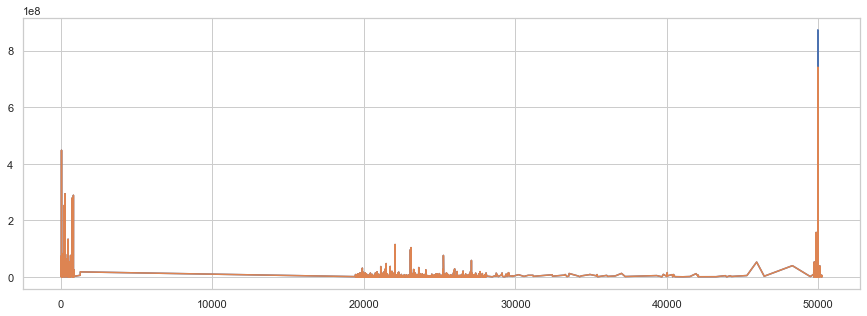

In [56]:
plt.figure(figsize=(15, 5))
plt.plot(x['total_energy']),plt.plot(x['sum_energy'])

In [57]:
comp = x['sum_energy'] == x['total_energy']
comp.value_counts()

False    3417
True       15
dtype: int64

In [58]:
x['sum_energy'].var(), x['total_energy'].var()

(401160772114485.3, 463478433203077.4)

In [59]:
m =(temp2 -temp3)
m

OSEBuildingID
1          75.7500
2          80.5000
3        1038.5000
5          57.1250
8         125.0000
           ...    
50222       0.1969
50223      -0.1550
50224      -0.1790
50225      -0.0105
50226      -0.0103
Length: 3432, dtype: float64

Text(0.5, 1.0, "Comparaison de l'énergie totale avec la somme")

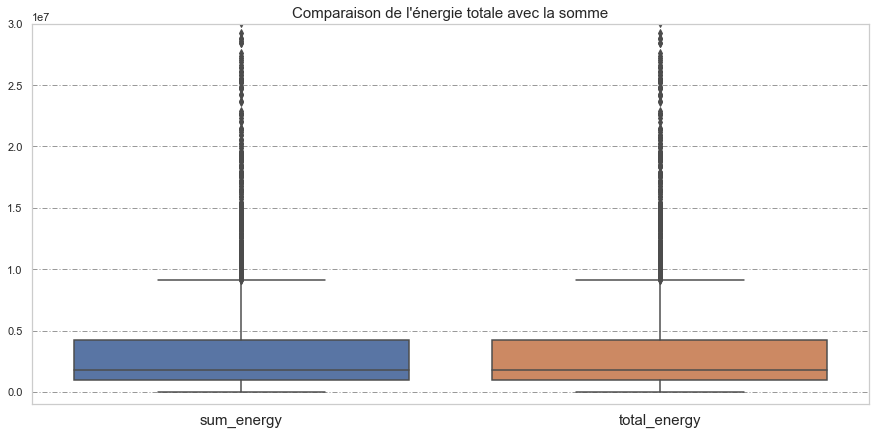

In [60]:
fig = plt.figure(figsize=(15, 7))
ax = plt.axes()
plt.xticks(rotation=0, fontsize = 15)
ax.set_ylim([-1000000,30000000])
plt.grid(True, color='0.6', dashes=(5,2,1,2))
sns.boxplot(data = x).set_title('Comparaison de l\'énergie totale avec la somme', fontsize = 15)

In [61]:
data_uni['PrimaryPropertyType'].unique() 
# Il y a des doublons avec des sauts de lignes et des espaces qu'on va corriger

array(['Hotel', 'Other', 'Mid-Rise Multifamily', 'Mixed Use Property',
       'K-12 School', 'University', 'Small- and Mid-Sized Office',
       'Self-Storage Facility', 'Warehouse', 'Large Office',
       'Low-Rise Multifamily', 'Senior Care Community', 'Medical Office',
       'Retail Store', 'Hospital', 'Residence Hall',
       'Distribution Center', 'Worship Facility',
       'Supermarket / Grocery Store', 'Laboratory',
       'Refrigerated Warehouse', 'Non-Refrigerated Warehouse',
       'High-Rise Multifamily', 'Restaurant', 'Restaurant\n', 'Office'],
      dtype=object)

In [62]:
data_uni['PrimaryPropertyType'] = [re.compile(r'[\n\r\t]').sub("", item) for index, item in data_uni.PrimaryPropertyType.iteritems()]
data_uni['PrimaryPropertyType'] = [re.compile(r' / ').sub("/", item) for index, item in data_uni.PrimaryPropertyType.iteritems()]

In [63]:
data_uni['PrimaryPropertyType'].unique() 


array(['Hotel', 'Other', 'Mid-Rise Multifamily', 'Mixed Use Property',
       'K-12 School', 'University', 'Small- and Mid-Sized Office',
       'Self-Storage Facility', 'Warehouse', 'Large Office',
       'Low-Rise Multifamily', 'Senior Care Community', 'Medical Office',
       'Retail Store', 'Hospital', 'Residence Hall',
       'Distribution Center', 'Worship Facility',
       'Supermarket/Grocery Store', 'Laboratory',
       'Refrigerated Warehouse', 'Non-Refrigerated Warehouse',
       'High-Rise Multifamily', 'Restaurant', 'Office'], dtype=object)

In [64]:
data_uni.shape

(3432, 40)

#### Selection de features:
****

    * Après la vérification on a trouvé que la surface totale 'PropertyGFATotal' égale 0.9999 la somme de'PropertyGFAParking'et'PropertyGFABuilding(s) dans ce cas on va garder que 'PropertyGFATotal'
    
    * Pour la consommation d'énergie on va supprimer les colonnes avec l'unité 'KWh' et garder l'unité anglaise kBtu, les données normalisée en fonction des conditions climatiques ne nous intéresse  pas dans l'analyse, on supprime les colonnes avec le suffixe WN
    

In [65]:
slct_col_uni = [ #'OSEBuildingID',
                'DataYear',
                'BuildingType',
                'PrimaryPropertyType',
                #'PropertyName',
                'Address', 
                #'City', 
                #'State', 
                'ZipCode',
                'TaxParcelIdentificationNumber',
                'CouncilDistrictCode', 
                'Neighborhood',
                'Latitude',
                'Longitude', 
                'YearBuilt',
                'NumberofBuildings',
                'NumberofFloors',
                 
                'PropertyGFATotal',      # faire le calcul de la somme == OK
                'PropertyGFAParking',    # faire le calcul de la somme 
                'PropertyGFABuilding(s)',# faire le calcul de la somme
                 
                #'ListOfAllPropertyUseTypes',
              
                #'LargestPropertyUseType', 
                #'LargestPropertyUseTypeGFA',
                #'SecondLargestPropertyUseType', 
                #'SecondLargestPropertyUseTypeGFA',
                #'ThirdLargestPropertyUseType', 
                #'ThirdLargestPropertyUseTypeGFA',
                
                #'YearsENERGYSTARCertified', 
                'ENERGYSTARScore', 
                 
                'SiteEUI(kBtu/sf)',     # data leakge
                'SiteEUIWN(kBtu/sf)',   # data leakge
                'SourceEUI(kBtu/sf)',   # data leakge
                'SourceEUIWN(kBtu/sf)', # data leakge
                 
                #'SiteEnergyUse(kBtu)',
                #'Electricity(kWh)',
                #'NaturalGas(therms)',
                'SiteEnergyUse(kBtu)',
                #'SiteEnergyUseWN(kBtu)', # faire le calcul de la somme == OK
                'SteamUse(kBtu)',        # faire le calcul de la somme
                'Electricity(kBtu)',     # faire le calcul de la somme
                'NaturalGas(kBtu)',      # faire le calcul de la somme
                #'DefaultData', 
                #'Comments',
                'ComplianceStatus',
                #'Outlier',
                'TotalGHGEmissions',
                #'GHGEmissionsIntensity'
]


In [66]:
data_uni = data_uni[slct_col_uni]
data_uni.shape

(3432, 27)

In [67]:
data_uni.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3432 entries, 1 to 50226
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DataYear                       3432 non-null   int64  
 1   BuildingType                   3432 non-null   object 
 2   PrimaryPropertyType            3432 non-null   object 
 3   Address                        3432 non-null   object 
 4   ZipCode                        3416 non-null   float64
 5   TaxParcelIdentificationNumber  3431 non-null   object 
 6   CouncilDistrictCode            3432 non-null   int64  
 7   Neighborhood                   3432 non-null   object 
 8   Latitude                       3432 non-null   float64
 9   Longitude                      3432 non-null   float64
 10  YearBuilt                      3432 non-null   int64  
 11  NumberofBuildings              3432 non-null   int64  
 12  NumberofFloors                 3432 non-null   

### Traitement des valeurs aberrantes et des outliers
****
     * voir les valeurs négatives Min ====> OK
     * voir les valeurs Max et dinstinguer entre des batiments et des unsines par exemple, si les vals sont énormes, il faut les enlever et les considérer comme des valeurs aberrantes, cela influe sur notre modéisation. 
****

In [68]:
data_uni.describe()

,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions
count,3432.000000,3416.000000,3432.000000,3432.000000,3432.000000,3432.000000,3.432000e+03,3432.000000,3.432000e+03,3432.000000,3.432000e+03,2656.000000,3429.000000,3429.000000,3428.000000,3428.000000,3.429000e+03,3.428000e+03,3.428000e+03,3.428000e+03,3428.000000
mean,2015.026807,98116.965457,4.446970,47.624211,-122.334819,1968.360140,-2.687463e+15,4.688228,9.447183e+04,9651.224068,8.482061e+04,68.116717,54.445859,57.489341,133.943174,138.589950,5.398222e+06,2.737963e+05,3.710342e+06,1.361560e+06,119.311982
std,0.161541,18.610817,2.120142,0.047818,0.027163,33.182901,1.574404e+17,5.458473,2.172062e+05,32953.838541,2.048840e+05,26.377049,55.895447,57.157732,137.744473,137.275549,2.152855e+07,3.795683e+06,1.478348e+07,6.729292e+06,534.287074
min,2015.000000,98006.000000,1.000000,47.499170,-122.414250,1900.000000,-9.223372e+18,0.000000,1.128500e+04,-1.500000,-8.451000e+03,1.000000,0.000000,0.000000,0.000000,-2.050000,0.000000e+00,0.000000e+00,7.000000e+00,0.000000e+00,0.090000
25%,2015.000000,98105.000000,3.000000,47.600077,-122.350662,1948.000000,1.000000e+00,2.000000,2.846350e+04,0.000000,2.726825e+04,52.500000,27.850000,29.600000,74.287500,79.500000,9.293272e+05,0.000000e+00,6.345736e+05,0.000000e+00,9.568750
50%,2015.000000,98115.000000,4.000000,47.618735,-122.332630,1974.000000,1.000000e+00,4.000000,4.419500e+04,0.000000,4.213725e+04,75.500000,38.100001,40.650001,95.900000,101.599999,1.792235e+06,0.000000e+00,1.173787e+06,3.211605e+05,33.842500
75%,2015.000000,98122.000000,7.000000,47.657157,-122.319407,1997.000000,1.000000e+00,5.000000,9.044875e+04,2890.250000,8.192375e+04,89.625000,60.050000,64.750001,144.150000,149.900002,4.195498e+06,0.000000e+00,2.802775e+06,1.152789e+06,91.890000
max,2016.000000,98272.000000,7.000000,47.733870,-122.220966,2015.000000,1.110000e+02,99.000000,9.320156e+06,512608.000000,9.320156e+06,100.000000,834.400024,834.400024,2620.000000,2620.000000,8.739237e+08,1.314066e+08,6.570744e+08,2.979090e+08,16870.980000


<AxesSubplot:>

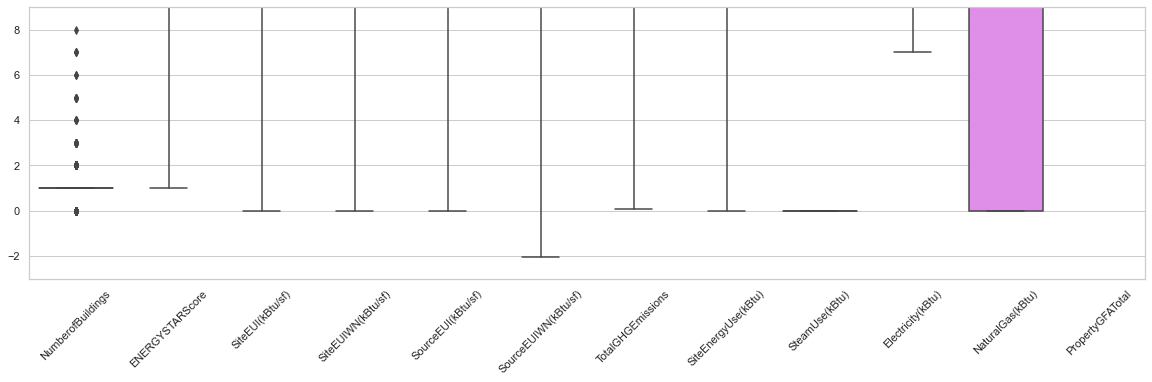

In [69]:
list_2 = ['NumberofBuildings','ENERGYSTARScore','SiteEUI(kBtu/sf)','SiteEUIWN(kBtu/sf)',
          'SourceEUI(kBtu/sf)','SourceEUIWN(kBtu/sf)','TotalGHGEmissions',
         'SiteEnergyUse(kBtu)','SteamUse(kBtu)','Electricity(kBtu)','NaturalGas(kBtu)', 'PropertyGFATotal' ]

fig = plt.figure(figsize=(20, 5))
ax = plt.axes()
plt.xticks(rotation=45)
ax.set_ylim([-3,9])
sns.boxplot(data= data_uni[list_2])

In [70]:
data_uni.min()

DataYear                            2015
BuildingType                      Campus
PrimaryPropertyType       Distributio...
Address                   (ID23682) 3...
ZipCode                          98006.0
CouncilDistrictCode                    1
Neighborhood                     BALLARD
Latitude                        47.49917
Longitude                     -122.41425
YearBuilt                           1900
NumberofBuildings         -9223372036...
NumberofFloors                         0
PropertyGFATotal                 11285.0
PropertyGFAParking                  -1.5
PropertyGFABuilding(s)           -8451.0
ENERGYSTARScore                      1.0
SiteEUI(kBtu/sf)                     0.0
SiteEUIWN(kBtu/sf)                   0.0
SourceEUI(kBtu/sf)                   0.0
SourceEUIWN(kBtu/sf)               -2.05
SiteEnergyUse(kBtu)                  0.0
SteamUse(kBtu)                       0.0
Electricity(kBtu)                    7.0
NaturalGas(kBtu)                     0.0
ComplianceStatus

In [71]:
data_uni.shape

(3432, 27)

### Suppréssion des valeurs négatives
****

In [72]:

for col in ['SourceEUIWN(kBtu/sf)', 'PropertyGFABuilding(s)', 'PropertyGFAParking', 'NumberofBuildings'] :
    data_uni = data_uni[data_uni[col] >= 0] 

In [73]:
data_uni.min()

DataYear                            2015
BuildingType                      Campus
PrimaryPropertyType       Distributio...
Address                   (ID23682) 3...
ZipCode                          98006.0
CouncilDistrictCode                    1
Neighborhood                     BALLARD
Latitude                        47.49917
Longitude                     -122.41425
YearBuilt                           1900
NumberofBuildings                      0
NumberofFloors                         0
PropertyGFATotal                 11285.0
PropertyGFAParking                   0.0
PropertyGFABuilding(s)            5352.5
ENERGYSTARScore                      1.0
SiteEUI(kBtu/sf)                     0.0
SiteEUIWN(kBtu/sf)                   0.0
SourceEUI(kBtu/sf)                   0.0
SourceEUIWN(kBtu/sf)                 0.0
SiteEnergyUse(kBtu)                  0.0
SteamUse(kBtu)                       0.0
Electricity(kBtu)                    7.0
NaturalGas(kBtu)                     0.0
ComplianceStatus

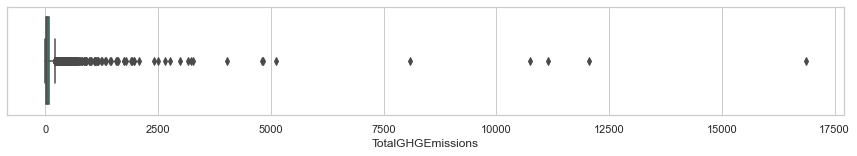

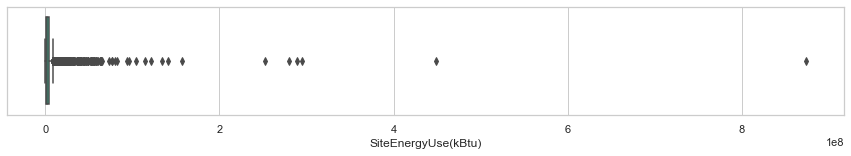

In [74]:
outliers = ['TotalGHGEmissions','SiteEnergyUse(kBtu)']
for col in data_uni[outliers].columns:
    fig = plt.figure(figsize=(15, 2))
    sns.boxplot(x=data_uni[col], color='#11E5AD')

## Méthode Percentil
****
    *  enlever les 5% près de 100% 
*****

In [75]:
for col in data_uni[outliers].columns:
    data_uni.loc[data_uni[col] > data_uni[col].quantile(0.95)] = np.nan
data_uni = data_uni.dropna()

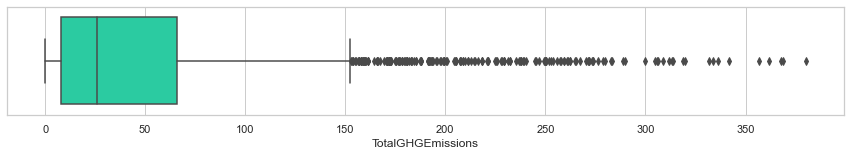

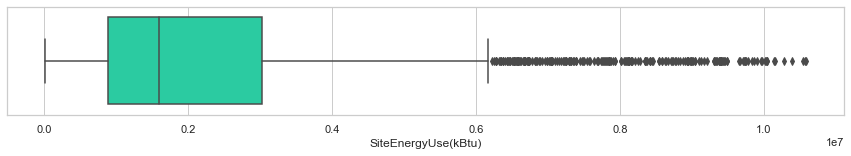

In [76]:
for col in data_uni[outliers].columns:
    fig = plt.figure(figsize=(15, 2))
    sns.boxplot(x=data_uni[col], color='#11E5AD')

* Nombre de colonnes sans NaN -------: 27
* Nombre de colonnes NaN ------------: 0
* Nombre de colonnes mixtes----------: 0
* Nombre de ligne entièrement nulles : 0
* Nombre de ligne mixtes ----------- : 0
* Nombre de ligne sans NaN ----------: 2409
* Nombre de lignes -----------------------: 2409
* Nombre de colonnes ---------------------: 27
* Nombre de cases ------------------------: 65043
* Nombre de valeurs nulles ---------------: 0
* Nombre de valeurs non nulles -----------: 65043
* le pourcentage des valeurs nulles ------: 0.0 %
* le pourcentage des valeurs non nulles --: 100.0 %


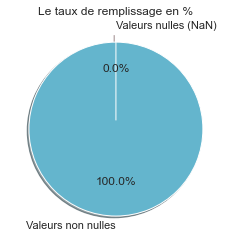

In [77]:
calc_inf(data_uni, True)

In [78]:
data_uni

,DataYear,BuildingType,PrimaryPropertyType,Address,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),ComplianceStatus,TotalGHGEmissions
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2015.0,NonResidential,Hotel,405 Olive way,98101.0,0659000030,7.0,DOWNTOWN,47.61220,-122.33799,1927.0,1.0,12.0,88434.0,0.0,88434.0,62.5,80.299998,82.300002,178.000000,182.050000,7.103895e+06,2013457.000,3816093.5,1274420.5,Compliant,249.705
2,2015.0,NonResidential,Hotel,724 Pine st...,98101.0,0659000220,7.0,DOWNTOWN,47.61317,-122.33393,1996.0,1.0,11.0,103566.0,15064.0,88502.0,56.0,94.600002,98.450001,183.700003,187.299997,8.371084e+06,0.000,3574131.0,4797033.5,Compliant,279.685
10,2015.0,NonResidential,Hotel,1619 9th Av...,98101.0,0660000825,7.0,DOWNTOWN,47.61390,-122.33283,1926.0,1.0,11.0,83008.0,0.0,83008.0,26.0,73.850002,77.050000,148.050003,156.449998,6.005818e+06,0.000,2745456.5,3260417.5,Compliant,192.300
13,2015.0,Multifamily...,Mid-Rise Mu...,607 - 3rd Ave.,98104.0,0939000105,7.0,DOWNTOWN,47.60284,-122.33184,1910.0,1.0,6.0,63712.0,1496.0,62216.0,1.5,81.600000,89.149999,180.399998,189.099997,4.580504e+06,1261605.594,2451032.5,867914.5,Compliant,160.560
17,2015.0,NonResidential,Hotel,400 Spring ...,98104.0,0942000210,7.0,DOWNTOWN,47.60699,-122.33346,1928.0,1.0,9.0,65009.0,0.0,65009.0,43.5,103.100000,97.300002,160.050003,154.000002,6.701642e+06,1821757.750,1479028.5,3400889.5,Compliant,331.550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50088,2016.0,Multifamily...,Low-Rise Mu...,3601 Greenw...,98103.0,1972200290,6.0,LAKE UNION,47.65295,-122.35593,2015.0,1.0,4.0,41403.0,0.0,41403.0,88.0,27.900000,28.900000,66.000000,69.300003,1.170777e+06,0.000,739043.0,431734.0,Compliant,28.080
50090,2016.0,Multifamily...,Mid-Rise Mu...,4717 Brookl...,98105.0,8817400110,4.0,NORTHEAST,47.66366,-122.31450,2015.0,1.0,7.0,63825.0,4850.0,58975.0,99.0,32.799999,35.000000,78.599998,85.400002,2.337651e+06,0.000,1503925.0,833726.0,Compliant,54.760
50093,2016.0,Multifamily...,Mid-Rise Mu...,820 Yesler Way,98104.0,9822000080,3.0,EAST,47.60189,-122.32182,2015.0,1.0,6.0,86045.0,8908.0,77137.0,84.0,27.100000,27.100000,85.099998,85.099998,2.161240e+06,0.000,2161240.0,0.0,Compliant,15.070


### L'age des batiments
*****
    * on va calculer l'age de chaque batiment par rapport à l'année 2016

In [79]:
data_uni.insert(7,'AgeOfBuilding', 0)

In [80]:
data_uni['AgeOfBuilding'] = data_uni['DataYear'] - data_uni['YearBuilt']
data_uni

,DataYear,BuildingType,PrimaryPropertyType,Address,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,AgeOfBuilding,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),ComplianceStatus,TotalGHGEmissions
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2015.0,NonResidential,Hotel,405 Olive way,98101.0,0659000030,7.0,88.0,DOWNTOWN,47.61220,-122.33799,1927.0,1.0,12.0,88434.0,0.0,88434.0,62.5,80.299998,82.300002,178.000000,182.050000,7.103895e+06,2013457.000,3816093.5,1274420.5,Compliant,249.705
2,2015.0,NonResidential,Hotel,724 Pine st...,98101.0,0659000220,7.0,19.0,DOWNTOWN,47.61317,-122.33393,1996.0,1.0,11.0,103566.0,15064.0,88502.0,56.0,94.600002,98.450001,183.700003,187.299997,8.371084e+06,0.000,3574131.0,4797033.5,Compliant,279.685
10,2015.0,NonResidential,Hotel,1619 9th Av...,98101.0,0660000825,7.0,89.0,DOWNTOWN,47.61390,-122.33283,1926.0,1.0,11.0,83008.0,0.0,83008.0,26.0,73.850002,77.050000,148.050003,156.449998,6.005818e+06,0.000,2745456.5,3260417.5,Compliant,192.300
13,2015.0,Multifamily...,Mid-Rise Mu...,607 - 3rd Ave.,98104.0,0939000105,7.0,105.0,DOWNTOWN,47.60284,-122.33184,1910.0,1.0,6.0,63712.0,1496.0,62216.0,1.5,81.600000,89.149999,180.399998,189.099997,4.580504e+06,1261605.594,2451032.5,867914.5,Compliant,160.560
17,2015.0,NonResidential,Hotel,400 Spring ...,98104.0,0942000210,7.0,87.0,DOWNTOWN,47.60699,-122.33346,1928.0,1.0,9.0,65009.0,0.0,65009.0,43.5,103.100000,97.300002,160.050003,154.000002,6.701642e+06,1821757.750,1479028.5,3400889.5,Compliant,331.550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50088,2016.0,Multifamily...,Low-Rise Mu...,3601 Greenw...,98103.0,1972200290,6.0,1.0,LAKE UNION,47.65295,-122.35593,2015.0,1.0,4.0,41403.0,0.0,41403.0,88.0,27.900000,28.900000,66.000000,69.300003,1.170777e+06,0.000,739043.0,431734.0,Compliant,28.080
50090,2016.0,Multifamily...,Mid-Rise Mu...,4717 Brookl...,98105.0,8817400110,4.0,1.0,NORTHEAST,47.66366,-122.31450,2015.0,1.0,7.0,63825.0,4850.0,58975.0,99.0,32.799999,35.000000,78.599998,85.400002,2.337651e+06,0.000,1503925.0,833726.0,Compliant,54.760
50093,2016.0,Multifamily...,Mid-Rise Mu...,820 Yesler Way,98104.0,9822000080,3.0,1.0,EAST,47.60189,-122.32182,2015.0,1.0,6.0,86045.0,8908.0,77137.0,84.0,27.100000,27.100000,85.099998,85.099998,2.161240e+06,0.000,2161240.0,0.0,Compliant,15.070


### Checker les ligne duppliquées

***

In [81]:
data_uni[data_uni.duplicated() == True].shape[0]

0

In [82]:
data_uni

,DataYear,BuildingType,PrimaryPropertyType,Address,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,AgeOfBuilding,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),ComplianceStatus,TotalGHGEmissions
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2015.0,NonResidential,Hotel,405 Olive way,98101.0,0659000030,7.0,88.0,DOWNTOWN,47.61220,-122.33799,1927.0,1.0,12.0,88434.0,0.0,88434.0,62.5,80.299998,82.300002,178.000000,182.050000,7.103895e+06,2013457.000,3816093.5,1274420.5,Compliant,249.705
2,2015.0,NonResidential,Hotel,724 Pine st...,98101.0,0659000220,7.0,19.0,DOWNTOWN,47.61317,-122.33393,1996.0,1.0,11.0,103566.0,15064.0,88502.0,56.0,94.600002,98.450001,183.700003,187.299997,8.371084e+06,0.000,3574131.0,4797033.5,Compliant,279.685
10,2015.0,NonResidential,Hotel,1619 9th Av...,98101.0,0660000825,7.0,89.0,DOWNTOWN,47.61390,-122.33283,1926.0,1.0,11.0,83008.0,0.0,83008.0,26.0,73.850002,77.050000,148.050003,156.449998,6.005818e+06,0.000,2745456.5,3260417.5,Compliant,192.300
13,2015.0,Multifamily...,Mid-Rise Mu...,607 - 3rd Ave.,98104.0,0939000105,7.0,105.0,DOWNTOWN,47.60284,-122.33184,1910.0,1.0,6.0,63712.0,1496.0,62216.0,1.5,81.600000,89.149999,180.399998,189.099997,4.580504e+06,1261605.594,2451032.5,867914.5,Compliant,160.560
17,2015.0,NonResidential,Hotel,400 Spring ...,98104.0,0942000210,7.0,87.0,DOWNTOWN,47.60699,-122.33346,1928.0,1.0,9.0,65009.0,0.0,65009.0,43.5,103.100000,97.300002,160.050003,154.000002,6.701642e+06,1821757.750,1479028.5,3400889.5,Compliant,331.550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50088,2016.0,Multifamily...,Low-Rise Mu...,3601 Greenw...,98103.0,1972200290,6.0,1.0,LAKE UNION,47.65295,-122.35593,2015.0,1.0,4.0,41403.0,0.0,41403.0,88.0,27.900000,28.900000,66.000000,69.300003,1.170777e+06,0.000,739043.0,431734.0,Compliant,28.080
50090,2016.0,Multifamily...,Mid-Rise Mu...,4717 Brookl...,98105.0,8817400110,4.0,1.0,NORTHEAST,47.66366,-122.31450,2015.0,1.0,7.0,63825.0,4850.0,58975.0,99.0,32.799999,35.000000,78.599998,85.400002,2.337651e+06,0.000,1503925.0,833726.0,Compliant,54.760
50093,2016.0,Multifamily...,Mid-Rise Mu...,820 Yesler Way,98104.0,9822000080,3.0,1.0,EAST,47.60189,-122.32182,2015.0,1.0,6.0,86045.0,8908.0,77137.0,84.0,27.100000,27.100000,85.099998,85.099998,2.161240e+06,0.000,2161240.0,0.0,Compliant,15.070


In [83]:
lst_to_dlt = ['DataYear','ZipCode',
              'CouncilDistrictCode',
              'YearBuilt',
              'PropertyGFAParking',
              'PropertyGFABuilding(s)',
              'SiteEUI(kBtu/sf)','SiteEUIWN(kBtu/sf)',
              'SourceEUI(kBtu/sf)','SourceEUIWN(kBtu/sf)','SteamUse(kBtu)',
              'Electricity(kBtu)','NaturalGas(kBtu)','Address',
              'ComplianceStatus','TaxParcelIdentificationNumber']

In [84]:
data_flt = data_uni.drop(lst_to_dlt, axis = 1)
data_flt.shape

(2409, 12)

In [85]:
data_flt

,BuildingType,PrimaryPropertyType,AgeOfBuilding,Neighborhood,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions
OSEBuildingID,,,,,,,,,,,,
1,NonResidential,Hotel,88.0,DOWNTOWN,47.61220,-122.33799,1.0,12.0,88434.0,62.5,7.103895e+06,249.705
2,NonResidential,Hotel,19.0,DOWNTOWN,47.61317,-122.33393,1.0,11.0,103566.0,56.0,8.371084e+06,279.685
10,NonResidential,Hotel,89.0,DOWNTOWN,47.61390,-122.33283,1.0,11.0,83008.0,26.0,6.005818e+06,192.300
13,Multifamily...,Mid-Rise Mu...,105.0,DOWNTOWN,47.60284,-122.33184,1.0,6.0,63712.0,1.5,4.580504e+06,160.560
17,NonResidential,Hotel,87.0,DOWNTOWN,47.60699,-122.33346,1.0,9.0,65009.0,43.5,6.701642e+06,331.550
...,...,...,...,...,...,...,...,...,...,...,...,...
50088,Multifamily...,Low-Rise Mu...,1.0,LAKE UNION,47.65295,-122.35593,1.0,4.0,41403.0,88.0,1.170777e+06,28.080
50090,Multifamily...,Mid-Rise Mu...,1.0,NORTHEAST,47.66366,-122.31450,1.0,7.0,63825.0,99.0,2.337651e+06,54.760
50093,Multifamily...,Mid-Rise Mu...,1.0,EAST,47.60189,-122.32182,1.0,6.0,86045.0,84.0,2.161240e+06,15.070


# Analyse univariée

### Distribution des données

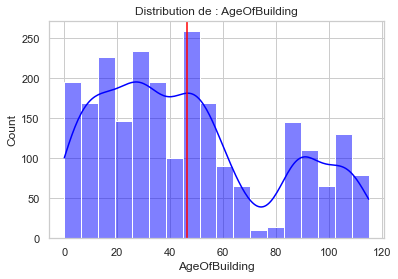

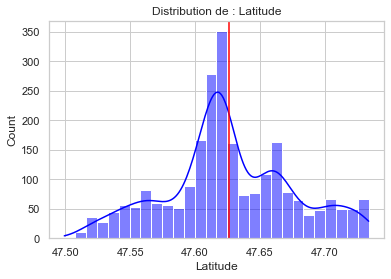

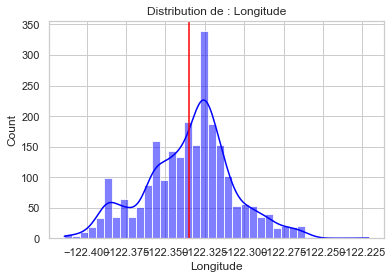

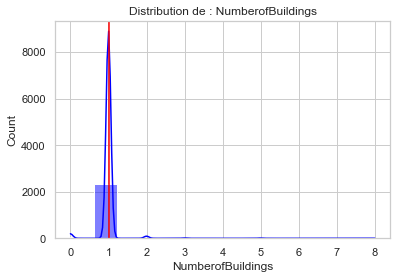

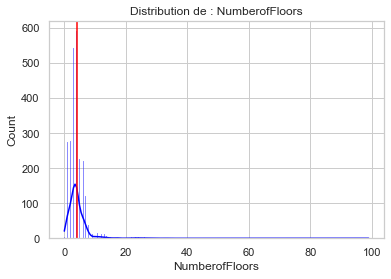

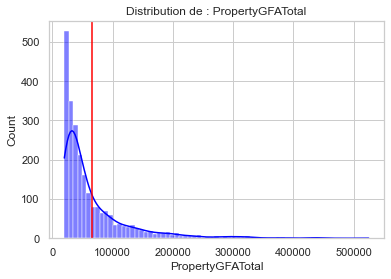

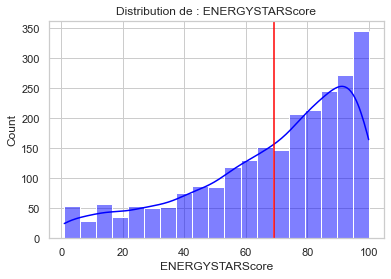

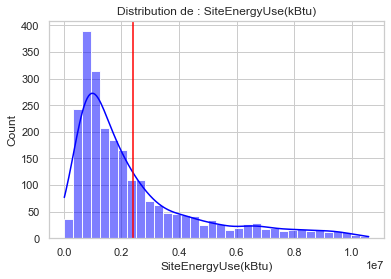

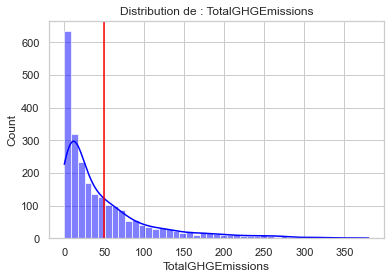

In [86]:

for col in data_flt.select_dtypes(['int32', 'float64']).columns:
    #dis_nan_org = data_flt[col].values
    sns.histplot(data_flt[col], color= 'blue', kde=True)
    mean = data_flt[col].mean()
    plt.axvline(mean, 0, 1, color='red')
    plt.title('Distribution de : '+ col)
    plt.show()

Indicateurs de distribution pour AgeOfBuilding
--------------------------------------------------
count    2409.00000
mean       46.43379
std        32.55982
min         0.00000
25%        20.00000
50%        41.00000
75%        65.00000
max       115.00000
Name: AgeOfBuilding, dtype: float64
Indicateurs de distribution pour Latitude
--------------------------------------------------
count    2409.000000
mean       47.626025
std         0.049012
min        47.499170
25%        47.601100
50%        47.620940
75%        47.659260
max        47.733870
Name: Latitude, dtype: float64
Indicateurs de distribution pour Longitude
--------------------------------------------------
count    2409.000000
mean     -122.334783
std         0.027978
min      -122.414250
25%      -122.353220
50%      -122.331970
75%      -122.318380
max      -122.220966
Name: Longitude, dtype: float64
Indicateurs de distribution pour NumberofBuildings
--------------------------------------------------
count    2409.0000

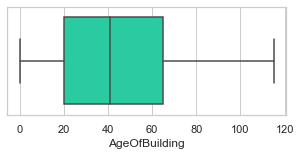

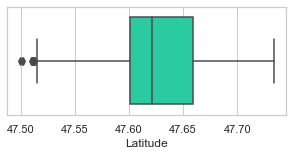

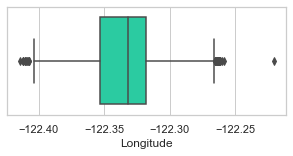

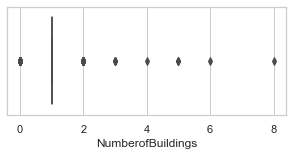

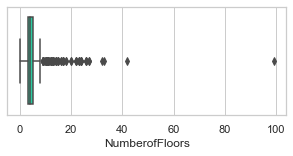

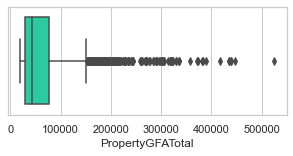

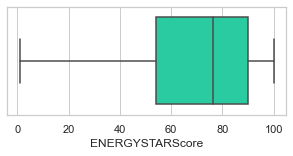

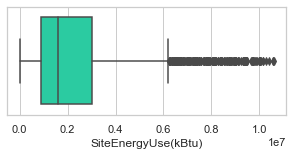

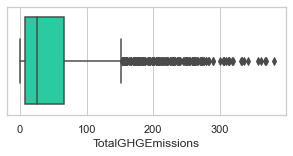

In [87]:
for col in data_flt.select_dtypes(['int32', 'float64']).columns:
    fig = plt.figure(figsize=(5, 2))
    
    sns.boxplot(x=data_flt[col], color='#11E5AD')
    print("Indicateurs de distribution pour",col)
    print('-'*50)
    print( data_flt[col].describe())

(array([], dtype=float64), [])

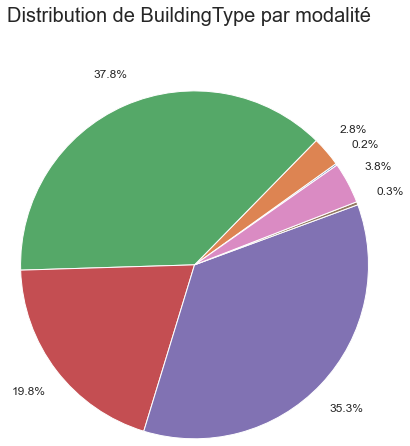

In [88]:
y = data_flt['BuildingType'].value_counts(normalize=False).sort_index()
#labels=['A','B','C','D','E', 'f','g']

plt.pie(y, pctdistance=1.2, labeldistance=0.01, startangle=35, radius=2, autopct = '%1.1f%%', 
         normalize=True)
plt.suptitle('Distribution de BuildingType par modalité',y=1.4, fontsize = 20)
plt.xticks(rotation=180)

# Analyse multivariée

### Matrice de corrélation
    

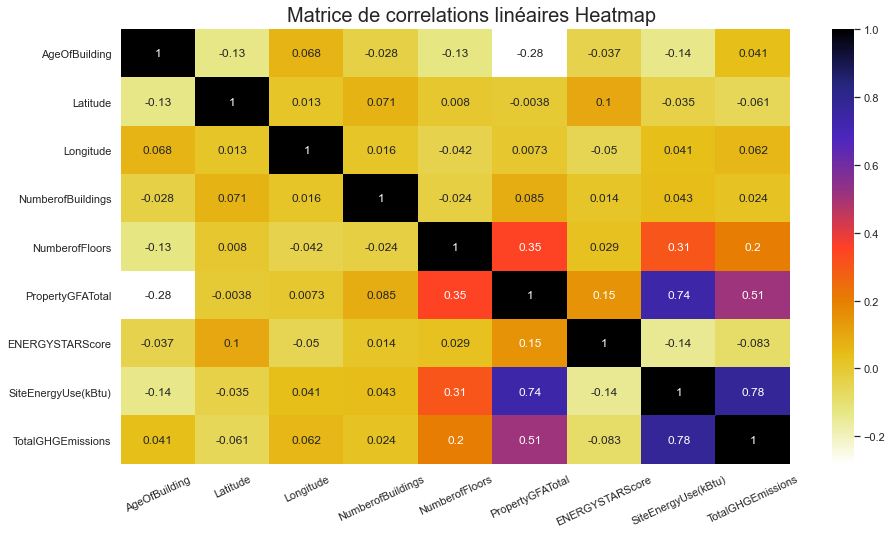

In [89]:

cor = data_flt.select_dtypes(['int32', 'float64']).corr()
fig, ax = plt.subplots(figsize=(15,8)) 
sns.heatmap(cor, annot=True, cmap= plt.cm.CMRmap_r)
plt.suptitle('Matrice de correlations linéaires Heatmap',x=0.45,y=0.92, fontsize = 20)
plt.xticks(rotation=25)

plt.show()

***
    * On constate que la consommation totale d'énergie est fortement corrélée à la surface totale GFA des bâtiments
    * Les éissions également bien corrélées avec la consommation totale d'énergie
    Il n'y a pas de corréltion qui dépasse 80 donc on va garder cette liste de variable

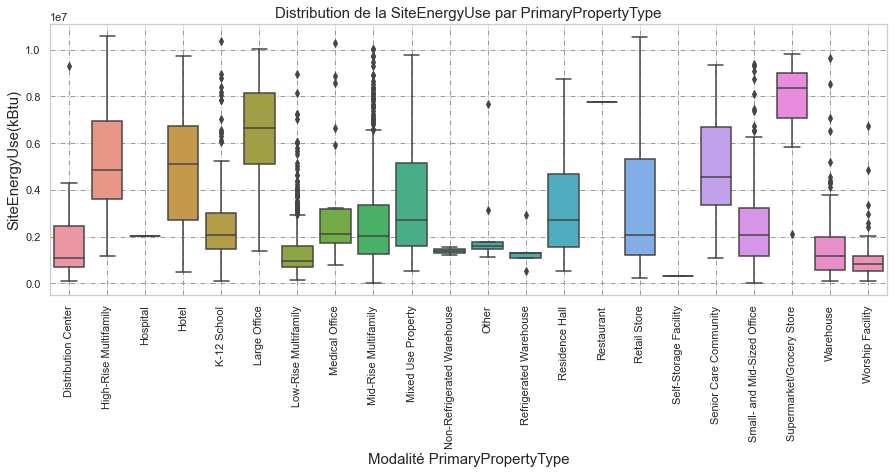

In [90]:
data = data_flt
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
order = sorted(data_flt["PrimaryPropertyType"].unique())
ax = sns.boxplot(data=data, x='PrimaryPropertyType', y='SiteEnergyUse(kBtu)', order = order )
ax.set_title("Distribution de la SiteEnergyUse par PrimaryPropertyType", fontsize = 15)
ax.set_xlabel("Modalité PrimaryPropertyType",fontsize = 15)
ax.set_ylabel("SiteEnergyUse(kBtu)", fontsize = 15)
plt.grid(True, color='0.6', dashes=(5,2,1,2))
plt.xticks(rotation=90)

plt.show()

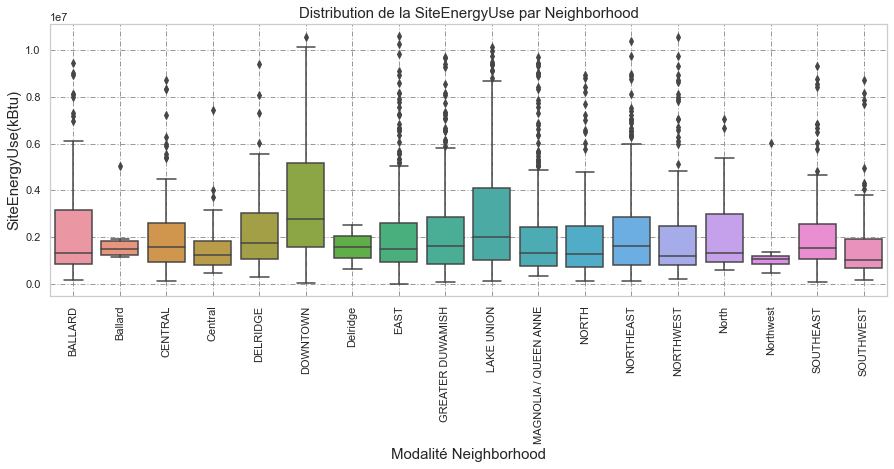

In [91]:

data = data_flt
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
order = sorted(data_flt["Neighborhood"].unique())
ax = sns.boxplot(data=data, x='Neighborhood', y='SiteEnergyUse(kBtu)', order = order )
ax.set_title("Distribution de la SiteEnergyUse par Neighborhood", fontsize = 15)
ax.set_xlabel("Modalité Neighborhood",fontsize = 15)
ax.set_ylabel("SiteEnergyUse(kBtu)", fontsize = 15)
plt.grid(True, color='0.6', dashes=(5,2,1,2))
plt.xticks(rotation=90)

plt.show()

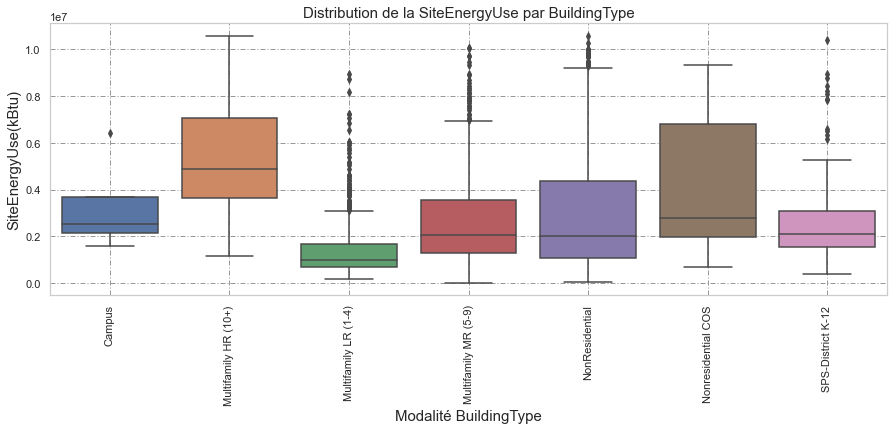

In [92]:

data = data_flt
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
order = sorted(data_flt["BuildingType"].unique())
ax = sns.boxplot(data=data, x='BuildingType', y='SiteEnergyUse(kBtu)', order = order )
ax.set_title("Distribution de la SiteEnergyUse par BuildingType", fontsize = 15)
ax.set_xlabel("Modalité BuildingType",fontsize = 15)
ax.set_ylabel("SiteEnergyUse(kBtu)", fontsize = 15)
plt.grid(True, color='0.6', dashes=(5,2,1,2))
plt.xticks(rotation=90)

plt.show()

### Suppression des valeurs nulles dans 'NumberofBuildings' et 'NumberofFloors'
***

In [93]:
(data_flt["NumberofBuildings"] ==0).value_counts()

False    2358
True       51
Name: NumberofBuildings, dtype: int64

In [94]:
(data_flt["NumberofFloors"] ==0).value_counts()

False    2404
True        5
Name: NumberofFloors, dtype: int64

In [95]:
(data_flt['PropertyGFATotal'] == 0).value_counts()

False    2409
Name: PropertyGFATotal, dtype: int64

In [96]:
for col in  ['NumberofBuildings', "NumberofFloors"]:
    data_flt[col] = data_flt[col].apply(lambda x : 1 if x == 0 else x)


In [97]:
(data_flt["NumberofBuildings"] ==0).value_counts()

False    2409
Name: NumberofBuildings, dtype: int64

In [98]:
(data_flt["NumberofFloors"] ==0).value_counts()

False    2409
Name: NumberofFloors, dtype: int64

In [99]:
data_flt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2409 entries, 1 to 50098
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BuildingType         2409 non-null   object 
 1   PrimaryPropertyType  2409 non-null   object 
 2   AgeOfBuilding        2409 non-null   float64
 3   Neighborhood         2409 non-null   object 
 4   Latitude             2409 non-null   float64
 5   Longitude            2409 non-null   float64
 6   NumberofBuildings    2409 non-null   float64
 7   NumberofFloors       2409 non-null   float64
 8   PropertyGFATotal     2409 non-null   float64
 9   ENERGYSTARScore      2409 non-null   float64
 10  SiteEnergyUse(kBtu)  2409 non-null   float64
 11  TotalGHGEmissions    2409 non-null   float64
dtypes: float64(9), object(3)
memory usage: 309.2+ KB


In [100]:
data_flt.to_csv('D:/Projet Classrooms/Projet_4/data_flt.csv', index = False)